# performance metrics for the given Y and Y_score without sklearn

Objectives : To observe the performance metrics which varies with the different type of datasets

In [1]:
import numpy as np
import pandas as pd

##  1)  5_a data 

In [2]:
a_data = pd.read_csv("5_a.csv")

In [3]:
print(a_data.head(5))

     y     proba
0  1.0  0.637387
1  1.0  0.635165
2  1.0  0.766586
3  1.0  0.724564
4  1.0  0.889199


In [4]:
print("Number of data points :", a_data.shape)
print("The attribute of data :", a_data.columns)

Number of data points : (10100, 2)
The attribute of data : Index(['y', 'proba'], dtype='object')


### 1. Computation of y_score for 5_a data : 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] , Threshold = 0.5

In [5]:
def generate_Y_predicted(prob, threshold):
    y_pred_list= []
    for value in prob :
        if value < threshold:
            y_pred_list.append(0)
        else:
            y_pred_list.append(1)
    return y_pred_list      

In [6]:
probability = list(a_data['proba'].values)
threshold_value = 0.5

y_predicted_list_1 = generate_Y_predicted(probability,threshold_value)

a_data['Y predicted 1 '] = y_predicted_list_1
#a_data.drop(['proba'], axis=1, inplace=True )
a_data.head(5)

,y,proba,Y predicted 1
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


### 2. computation of confusion matrix for 5_a data 

True positive — actual = 1, predicted = 1

False positive — actual = 0, predicted = 1

False negative — actual = 1, predicted = 0

True negative — actual = 0, predicted = 0

In [7]:
def True_Positive(act_val,pred_val):
    count = 0
    for i in range(len(act_val)):
         if act_val[i] == 1 and pred_val[i] == 1:
            count = count+1
    return count

def False_Positive(act_val,pred_val):
    count = 0
    for i in range(len(act_val)):
         if act_val[i] == 0 and pred_val[i] == 1:
            count = count+1
    return count

def False_Negative(act_val,pred_val):
    count = 0
    for i in range(len(act_val)):
         if act_val[i] == 1 and pred_val[i] == 0:
            count = count+1
    return count

def True_Negative(act_val,pred_val):
    count = 0
    for i in range(len(act_val)):
         if act_val[i] == 0 and pred_val[i] == 0:
            count = count+1
    return count

In [8]:
def confusion_matrix_calculation(actual_value, predicted_value):
    TP = True_Positive (actual_value, predicted_value)
    FN = False_Negative (actual_value, predicted_value)
    FP = False_Positive(actual_value, predicted_value)
    TN = True_Negative(actual_value, predicted_value)
    return TP,FN,FP,TN


In [9]:
TP_a_1,FN_a_1,FP_a_1,TN_a_1 = confusion_matrix_calculation(a_data['y'],a_data['Y predicted 1 '])
matrix = np.array([[TN_a_1,FP_a_1],[FN_a_1,TP_a_1]])
print("The Confusion matrix for 5_a_data : ")
print(matrix)

The Confusion matrix for 5_a_data : 
[[    0   100]
 [    0 10000]]


###  3. Computation of scores for 5_a data :

True positive Rate (Recall score) = TP / (TP+FN)

In [10]:
recall_score_a_1 = TP_a_1 / (TP_a_1 + FN_a_1)

Precision score = TP / (TP+FP)

In [11]:
precision_score_a_1 = TP_a_1 / ( TP_a_1 + FP_a_1 )

f1 score = (2 *(precision * recall)) / (precision + recall)

In [12]:
f1_score_a = (2 *(precision_score_a_1 * recall_score_a_1)) / (precision_score_a_1 + recall_score_a_1)
print("The f1 score for 5_a data is :",f1_score_a)

The f1 score for 5_a data is : 0.9950248756218906


Accuracy Score = ( TP + TN ) / (TP + FN + FP + TN)

In [13]:
acc_score_a_1 = (TP_a_1 +TN_a_1) / (TP_a_1 + FN_a_1 + FP_a_1 + TN_a_1)
print("The accuracy Score for 5_a_data :",acc_score_a_1)

The accuracy Score for 5_a_data : 0.9900990099009901


False positive rate (FPR) = FP / (FP + TN)

In [14]:
fpr_a_a = FP_a_1 / (FP_a_1 + TN_a_1)

# 4. calculation of threshold values for a_data

In [15]:
# Threshold list

Threshold_list = []
for r in a_data['proba']:
    if r in Threshold_list :
        continue
    else:
        Threshold_list.append(r)

In [16]:
sorted_threshold_list = np.sort(Threshold_list)
print(len(sorted_threshold_list))

10100


In [17]:
# computation of y score for different threshold values :
probability = list(a_data['proba'].values)
for r in range(len(sorted_threshold_list)) :
    y_predicted_list = generate_Y_predicted(probability,sorted_threshold_list[r])
    a_data['Y predicted '+str(r)] = y_predicted_list

In [18]:
a_data.shape

(10100, 10103)

In [19]:
# confusion Matrix 
TP = []
FN= []
FP =[]
TN= []
for r in range(len(sorted_threshold_list)):
    tp,fn,fp,tn = confusion_matrix_calculation(a_data['y'],a_data['Y predicted '+str(r)])
    TP.append(tp)
    FN.append(fn)
    FP.append(fp)
    TN.append(tn)    

In [20]:
print(len(TP))
print(len(FN))
print(len(FP))
print(len(TN))

10100
10100
10100
10100


In [21]:
print("The Confusion matrix for 5_a_data with all the threshold values : ")
for r in range(len(sorted_threshold_list)):
    matrix = np.array([[TN[r],FP[r]],[FN[r],TP[r]]])
    print("matrix for ",sorted_threshold_list[r])
    print(matrix)

The Confusion matrix for 5_a_data with all the threshold values : 
matrix for  0.5000185949718864
[[    0   100]
 [    0 10000]]
matrix for  0.5000473407183691
[[   0  100]
 [   1 9999]]
matrix for  0.5000580078593906
[[   0  100]
 [   2 9998]]
matrix for  0.5000581510668138
[[   0  100]
 [   3 9997]]
matrix for  0.5000812600762915
[[   0  100]
 [   4 9996]]
matrix for  0.5001975312600645
[[   0  100]
 [   5 9995]]
matrix for  0.5001997894475683
[[   0  100]
 [   6 9994]]
matrix for  0.5002436770798491
[[   0  100]
 [   7 9993]]
matrix for  0.5003012990201631
[[   0  100]
 [   8 9992]]
matrix for  0.5003078086272976
[[   0  100]
 [   9 9991]]
matrix for  0.5003124481201102
[[   0  100]
 [  10 9990]]
matrix for  0.5003931646127534
[[   0  100]
 [  11 9989]]
matrix for  0.5005239334079858
[[   0  100]
 [  12 9988]]
matrix for  0.5005458634545259
[[   0  100]
 [  13 9987]]
matrix for  0.5005926110650423
[[   0  100]
 [  14 9986]]
matrix for  0.5007833080807186
[[   0  100]
 [  15 9985]]
m

matrix for  0.5148329058073312
[[   6   94]
 [ 381 9619]]
matrix for  0.514843219457093
[[   6   94]
 [ 382 9618]]
matrix for  0.5148470929825166
[[   6   94]
 [ 383 9617]]
matrix for  0.5148663270101195
[[   6   94]
 [ 384 9616]]
matrix for  0.5150572675819423
[[   6   94]
 [ 385 9615]]
matrix for  0.5150658641995306
[[   6   94]
 [ 386 9614]]
matrix for  0.5150705904060124
[[   6   94]
 [ 387 9613]]
matrix for  0.5150809189676621
[[   6   94]
 [ 388 9612]]
matrix for  0.5151814950552519
[[   6   94]
 [ 389 9611]]
matrix for  0.5151874044600343
[[   6   94]
 [ 390 9610]]
matrix for  0.5152557500081103
[[   6   94]
 [ 391 9609]]
matrix for  0.515293933132302
[[   6   94]
 [ 392 9608]]
matrix for  0.5154137000026189
[[   6   94]
 [ 393 9607]]
matrix for  0.5154204817103499
[[   6   94]
 [ 394 9606]]
matrix for  0.5154515835285158
[[   6   94]
 [ 395 9605]]
matrix for  0.5155793124523105
[[   6   94]
 [ 396 9604]]
matrix for  0.5156563154403327
[[   6   94]
 [ 397 9603]]
matrix for  0.51

[[   9   91]
 [ 802 9198]]
matrix for  0.5306299870767262
[[   9   91]
 [ 803 9197]]
matrix for  0.5306811850324721
[[   9   91]
 [ 804 9196]]
matrix for  0.5306906057149859
[[   9   91]
 [ 805 9195]]
matrix for  0.5307620635295329
[[   9   91]
 [ 806 9194]]
matrix for  0.5307890336512961
[[   9   91]
 [ 807 9193]]
matrix for  0.530839500824405
[[   9   91]
 [ 808 9192]]
matrix for  0.5308502125816177
[[   9   91]
 [ 809 9191]]
matrix for  0.5309207213305515
[[   9   91]
 [ 810 9190]]
matrix for  0.5309249503823215
[[   9   91]
 [ 811 9189]]
matrix for  0.5310444991495368
[[   9   91]
 [ 812 9188]]
matrix for  0.5310531314742138
[[   9   91]
 [ 813 9187]]
matrix for  0.5310719266470126
[[   9   91]
 [ 814 9186]]
matrix for  0.5310857512878537
[[   9   91]
 [ 815 9185]]
matrix for  0.5310860158492474
[[   9   91]
 [ 816 9184]]
matrix for  0.5311004215982345
[[   9   91]
 [ 817 9183]]
matrix for  0.5311050088731972
[[   9   91]
 [ 818 9182]]
matrix for  0.5311144850012766
[[   9   91]
 [

 [1295 8705]]
matrix for  0.5520338996532654
[[  11   89]
 [1296 8704]]
matrix for  0.5520950686560842
[[  11   89]
 [1297 8703]]
matrix for  0.5521002557867756
[[  11   89]
 [1298 8702]]
matrix for  0.5521249972140326
[[  11   89]
 [1299 8701]]
matrix for  0.5521554795604723
[[  11   89]
 [1300 8700]]
matrix for  0.5521715416685753
[[  11   89]
 [1301 8699]]
matrix for  0.5522406051782993
[[  11   89]
 [1302 8698]]
matrix for  0.5522758299883758
[[  11   89]
 [1303 8697]]
matrix for  0.5522771768595692
[[  11   89]
 [1304 8696]]
matrix for  0.5522936459082671
[[  11   89]
 [1305 8695]]
matrix for  0.5523177629356344
[[  11   89]
 [1306 8694]]
matrix for  0.5523532509238545
[[  11   89]
 [1307 8693]]
matrix for  0.5523802535649747
[[  11   89]
 [1308 8692]]
matrix for  0.5523917948095496
[[  11   89]
 [1309 8691]]
matrix for  0.5524005515496883
[[  11   89]
 [1310 8690]]
matrix for  0.5524235983977979
[[  11   89]
 [1311 8689]]
matrix for  0.5524671329433083
[[  11   89]
 [1312 8688]]


[[  15   85]
 [1719 8281]]
matrix for  0.5678139346039129
[[  15   85]
 [1720 8280]]
matrix for  0.5678174907868565
[[  15   85]
 [1721 8279]]
matrix for  0.5678904412870444
[[  15   85]
 [1722 8278]]
matrix for  0.567952560961454
[[  15   85]
 [1723 8277]]
matrix for  0.5680217319069254
[[  15   85]
 [1724 8276]]
matrix for  0.5680427699810595
[[  15   85]
 [1725 8275]]
matrix for  0.5680692431229194
[[  15   85]
 [1726 8274]]
matrix for  0.5681020973803561
[[  15   85]
 [1727 8273]]
matrix for  0.5681112417072587
[[  15   85]
 [1728 8272]]
matrix for  0.568211877845118
[[  15   85]
 [1729 8271]]
matrix for  0.5682454688969819
[[  15   85]
 [1730 8270]]
matrix for  0.5682464992050656
[[  15   85]
 [1731 8269]]
matrix for  0.5682976600536059
[[  15   85]
 [1732 8268]]
matrix for  0.5683312303027376
[[  15   85]
 [1733 8267]]
matrix for  0.5683402387139141
[[  15   85]
 [1734 8266]]
matrix for  0.5683868102696205
[[  15   85]
 [1735 8265]]
matrix for  0.5684122706151998
[[  15   85]
 [1

matrix for  0.5841396229527515
[[  18   82]
 [2132 7868]]
matrix for  0.5841609340522389
[[  18   82]
 [2133 7867]]
matrix for  0.5842304701282339
[[  18   82]
 [2134 7866]]
matrix for  0.5842517886013182
[[  18   82]
 [2135 7865]]
matrix for  0.5842778099435288
[[  18   82]
 [2136 7864]]
matrix for  0.5844424490304563
[[  18   82]
 [2137 7863]]
matrix for  0.5844811225387805
[[  18   82]
 [2138 7862]]
matrix for  0.5845065848279983
[[  18   82]
 [2139 7861]]
matrix for  0.5845463993208347
[[  18   82]
 [2140 7860]]
matrix for  0.5845504459620086
[[  18   82]
 [2141 7859]]
matrix for  0.5846776544645323
[[  18   82]
 [2142 7858]]
matrix for  0.5847352382865052
[[  18   82]
 [2143 7857]]
matrix for  0.5847918875374546
[[  18   82]
 [2144 7856]]
matrix for  0.5848701359605448
[[  18   82]
 [2145 7855]]
matrix for  0.5848971904172141
[[  18   82]
 [2146 7854]]
matrix for  0.5849045797645448
[[  18   82]
 [2147 7853]]
matrix for  0.5849313751374401
[[  18   82]
 [2148 7852]]
matrix for  0.

[[  25   75]
 [2701 7299]]
matrix for  0.6081100992793282
[[  25   75]
 [2702 7298]]
matrix for  0.6081269299229677
[[  25   75]
 [2703 7297]]
matrix for  0.6081557953624379
[[  25   75]
 [2704 7296]]
matrix for  0.6082893186289929
[[  25   75]
 [2705 7295]]
matrix for  0.608290134299043
[[  25   75]
 [2706 7294]]
matrix for  0.6083196120353658
[[  25   75]
 [2707 7293]]
matrix for  0.6083343413887543
[[  25   75]
 [2708 7292]]
matrix for  0.6083925296750614
[[  25   75]
 [2709 7291]]
matrix for  0.6083928063209518
[[  25   75]
 [2710 7290]]
matrix for  0.6084521513886413
[[  25   75]
 [2711 7289]]
matrix for  0.6085037894973546
[[  25   75]
 [2712 7288]]
matrix for  0.6085284523655345
[[  25   75]
 [2713 7287]]
matrix for  0.6085411804756328
[[  25   75]
 [2714 7286]]
matrix for  0.6085699307379099
[[  25   75]
 [2715 7285]]
matrix for  0.6086273377927217
[[  25   75]
 [2716 7284]]
matrix for  0.6086528178411763
[[  25   75]
 [2717 7283]]
matrix for  0.6086630700085395
[[  25   75]
 [

[[  30   70]
 [3204 6796]]
matrix for  0.6277849871456153
[[  30   70]
 [3205 6795]]
matrix for  0.627868827868672
[[  30   70]
 [3206 6794]]
matrix for  0.6278987594323102
[[  30   70]
 [3207 6793]]
matrix for  0.6280330569372211
[[  30   70]
 [3208 6792]]
matrix for  0.6280501006450673
[[  30   70]
 [3209 6791]]
matrix for  0.6280728501287463
[[  30   70]
 [3210 6790]]
matrix for  0.6281111137831454
[[  30   70]
 [3211 6789]]
matrix for  0.6281630988423904
[[  30   70]
 [3212 6788]]
matrix for  0.6282188230092447
[[  30   70]
 [3213 6787]]
matrix for  0.6282806600964909
[[  30   70]
 [3214 6786]]
matrix for  0.6282825310734022
[[  30   70]
 [3215 6785]]
matrix for  0.6283601951385416
[[  30   70]
 [3216 6784]]
matrix for  0.6283972124329685
[[  30   70]
 [3217 6783]]
matrix for  0.628423744108053
[[  30   70]
 [3218 6782]]
matrix for  0.6284310728471985
[[  30   70]
 [3219 6781]]
matrix for  0.6284333571509692
[[  30   70]
 [3220 6780]]
matrix for  0.6284907575231086
[[  30   70]
 [3

matrix for  0.6425837019437415
[[  36   64]
 [3599 6401]]
matrix for  0.6426330271758193
[[  36   64]
 [3600 6400]]
matrix for  0.6426737794030241
[[  36   64]
 [3601 6399]]
matrix for  0.642678768046895
[[  36   64]
 [3602 6398]]
matrix for  0.6427090480256489
[[  36   64]
 [3603 6397]]
matrix for  0.6428247681069548
[[  36   64]
 [3604 6396]]
matrix for  0.6428981464851703
[[  36   64]
 [3605 6395]]
matrix for  0.6429306972899185
[[  36   64]
 [3606 6394]]
matrix for  0.6429425218488252
[[  36   64]
 [3607 6393]]
matrix for  0.6430009389651414
[[  36   64]
 [3608 6392]]
matrix for  0.6430152902698849
[[  36   64]
 [3609 6391]]
matrix for  0.6430548683272506
[[  36   64]
 [3610 6390]]
matrix for  0.643066743212795
[[  36   64]
 [3611 6389]]
matrix for  0.6430678784351447
[[  36   64]
 [3612 6388]]
matrix for  0.6430975495322858
[[  36   64]
 [3613 6387]]
matrix for  0.6431099202087982
[[  36   64]
 [3614 6386]]
matrix for  0.6431549709192041
[[  36   64]
 [3615 6385]]
matrix for  0.64

matrix for  0.6575935746794808
[[  41   59]
 [3964 6036]]
matrix for  0.6576351069644816
[[  41   59]
 [3965 6035]]
matrix for  0.6576376312478375
[[  41   59]
 [3966 6034]]
matrix for  0.6577025041079042
[[  41   59]
 [3967 6033]]
matrix for  0.6578188745819356
[[  41   59]
 [3968 6032]]
matrix for  0.6578487205336534
[[  41   59]
 [3969 6031]]
matrix for  0.6578503575510289
[[  41   59]
 [3970 6030]]
matrix for  0.6579344774022583
[[  41   59]
 [3971 6029]]
matrix for  0.657942363053806
[[  41   59]
 [3972 6028]]
matrix for  0.6579426050534201
[[  41   59]
 [3973 6027]]
matrix for  0.6579619906706884
[[  41   59]
 [3974 6026]]
matrix for  0.6579991158053903
[[  41   59]
 [3975 6025]]
matrix for  0.6580559726288499
[[  41   59]
 [3976 6024]]
matrix for  0.6580978606695052
[[  41   59]
 [3977 6023]]
matrix for  0.6581862816905518
[[  41   59]
 [3978 6022]]
matrix for  0.6582302348184235
[[  41   59]
 [3979 6021]]
matrix for  0.6582730418409828
[[  41   59]
 [3980 6020]]
matrix for  0.6

[[  41   59]
 [4415 5585]]
matrix for  0.6748804984231769
[[  41   59]
 [4416 5584]]
matrix for  0.6749888260339343
[[  41   59]
 [4417 5583]]
matrix for  0.6750074261063947
[[  41   59]
 [4418 5582]]
matrix for  0.6751170772542231
[[  41   59]
 [4419 5581]]
matrix for  0.6751529163976604
[[  41   59]
 [4420 5580]]
matrix for  0.675198527954934
[[  41   59]
 [4421 5579]]
matrix for  0.675208620337908
[[  41   59]
 [4422 5578]]
matrix for  0.6752180621917769
[[  41   59]
 [4423 5577]]
matrix for  0.6752218560691106
[[  41   59]
 [4424 5576]]
matrix for  0.6752444819986971
[[  41   59]
 [4425 5575]]
matrix for  0.6752778758545965
[[  41   59]
 [4426 5574]]
matrix for  0.6752871078394971
[[  41   59]
 [4427 5573]]
matrix for  0.6753253758652806
[[  41   59]
 [4428 5572]]
matrix for  0.6753514230259318
[[  41   59]
 [4429 5571]]
matrix for  0.6754053206058799
[[  41   59]
 [4430 5570]]
matrix for  0.6754244536345557
[[  41   59]
 [4431 5569]]
matrix for  0.6754958582308551
[[  41   59]
 [4

 [5069 4931]]
matrix for  0.6994035007065063
[[  49   51]
 [5070 4930]]
matrix for  0.6994526858317213
[[  49   51]
 [5071 4929]]
matrix for  0.6995282578534039
[[  49   51]
 [5072 4928]]
matrix for  0.6995780718940545
[[  50   50]
 [5072 4928]]
matrix for  0.6995837154020439
[[  51   49]
 [5072 4928]]
matrix for  0.6996385173277143
[[  51   49]
 [5073 4927]]
matrix for  0.6996777970360977
[[  51   49]
 [5074 4926]]
matrix for  0.6996966744461803
[[  51   49]
 [5075 4925]]
matrix for  0.6997084416205906
[[  51   49]
 [5076 4924]]
matrix for  0.6997329942929603
[[  51   49]
 [5077 4923]]
matrix for  0.6997351106736539
[[  51   49]
 [5078 4922]]
matrix for  0.6997770696127413
[[  51   49]
 [5079 4921]]
matrix for  0.6998406583744341
[[  51   49]
 [5080 4920]]
matrix for  0.6998519507531278
[[  51   49]
 [5081 4919]]
matrix for  0.6998669209386241
[[  51   49]
 [5082 4918]]
matrix for  0.6998792524689714
[[  51   49]
 [5083 4917]]
matrix for  0.6999380845807784
[[  51   49]
 [5084 4916]]


matrix for  0.7178595342749025
[[  54   46]
 [5558 4442]]
matrix for  0.7179092054985454
[[  54   46]
 [5559 4441]]
matrix for  0.7179367565005219
[[  54   46]
 [5560 4440]]
matrix for  0.7179876912814573
[[  54   46]
 [5561 4439]]
matrix for  0.7180058255503168
[[  54   46]
 [5562 4438]]
matrix for  0.7180073032672896
[[  54   46]
 [5563 4437]]
matrix for  0.7180162300491194
[[  54   46]
 [5564 4436]]
matrix for  0.7180718690388548
[[  54   46]
 [5565 4435]]
matrix for  0.7180729899934906
[[  54   46]
 [5566 4434]]
matrix for  0.7181324790003343
[[  54   46]
 [5567 4433]]
matrix for  0.7181632123995378
[[  54   46]
 [5568 4432]]
matrix for  0.7181935137795823
[[  54   46]
 [5569 4431]]
matrix for  0.7182970463847929
[[  55   45]
 [5569 4431]]
matrix for  0.7183519488293256
[[  55   45]
 [5570 4430]]
matrix for  0.7184271092637149
[[  55   45]
 [5571 4429]]
matrix for  0.7186319789657077
[[  55   45]
 [5572 4428]]
matrix for  0.7187819786845079
[[  55   45]
 [5573 4427]]
matrix for  0.

 [6140 3860]]
matrix for  0.7404984091598101
[[  57   43]
 [6141 3859]]
matrix for  0.7405077323647494
[[  57   43]
 [6142 3858]]
matrix for  0.7405358498301875
[[  57   43]
 [6143 3857]]
matrix for  0.7405912964972703
[[  57   43]
 [6144 3856]]
matrix for  0.7405981528213615
[[  57   43]
 [6145 3855]]
matrix for  0.7406291490366891
[[  57   43]
 [6146 3854]]
matrix for  0.7406386246856733
[[  57   43]
 [6147 3853]]
matrix for  0.7406546267919246
[[  57   43]
 [6148 3852]]
matrix for  0.740753997842736
[[  57   43]
 [6149 3851]]
matrix for  0.7407558982984835
[[  57   43]
 [6150 3850]]
matrix for  0.7407958531195086
[[  57   43]
 [6151 3849]]
matrix for  0.7408623005448579
[[  57   43]
 [6152 3848]]
matrix for  0.7409838224425589
[[  57   43]
 [6153 3847]]
matrix for  0.7410262678186185
[[  57   43]
 [6154 3846]]
matrix for  0.7410291572677464
[[  57   43]
 [6155 3845]]
matrix for  0.7410494593692261
[[  57   43]
 [6156 3844]]
matrix for  0.7410505859325839
[[  57   43]
 [6157 3843]]
m

matrix for  0.7613668041633499
[[  68   32]
 [6688 3312]]
matrix for  0.761438294946265
[[  68   32]
 [6689 3311]]
matrix for  0.7614635493737889
[[  68   32]
 [6690 3310]]
matrix for  0.7615017149896433
[[  68   32]
 [6691 3309]]
matrix for  0.7615587004182804
[[  68   32]
 [6692 3308]]
matrix for  0.7615712979830898
[[  68   32]
 [6693 3307]]
matrix for  0.7615819316281092
[[  68   32]
 [6694 3306]]
matrix for  0.7615909600365695
[[  68   32]
 [6695 3305]]
matrix for  0.7615965297510814
[[  68   32]
 [6696 3304]]
matrix for  0.7616902747645541
[[  68   32]
 [6697 3303]]
matrix for  0.761698530781633
[[  68   32]
 [6698 3302]]
matrix for  0.761772058813793
[[  68   32]
 [6699 3301]]
matrix for  0.7618078263817427
[[  68   32]
 [6700 3300]]
matrix for  0.7618496956259933
[[  68   32]
 [6701 3299]]
matrix for  0.7618680590294229
[[  68   32]
 [6702 3298]]
matrix for  0.7618712795142161
[[  68   32]
 [6703 3297]]
matrix for  0.7618819416314264
[[  68   32]
 [6704 3296]]
matrix for  0.761

 [7090 2910]]
matrix for  0.7765251213600908
[[  71   29]
 [7091 2909]]
matrix for  0.7765311704148421
[[  71   29]
 [7092 2908]]
matrix for  0.7765636696037552
[[  71   29]
 [7093 2907]]
matrix for  0.7766094956026472
[[  71   29]
 [7094 2906]]
matrix for  0.7766642375887078
[[  71   29]
 [7095 2905]]
matrix for  0.7766778423937204
[[  71   29]
 [7096 2904]]
matrix for  0.7766909751085858
[[  71   29]
 [7097 2903]]
matrix for  0.7767000248020963
[[  71   29]
 [7098 2902]]
matrix for  0.7768004710039127
[[  71   29]
 [7099 2901]]
matrix for  0.7768522960493336
[[  71   29]
 [7100 2900]]
matrix for  0.7768573573763922
[[  71   29]
 [7101 2899]]
matrix for  0.7768660926110977
[[  71   29]
 [7102 2898]]
matrix for  0.7768833708889691
[[  71   29]
 [7103 2897]]
matrix for  0.7769111590941419
[[  71   29]
 [7104 2896]]
matrix for  0.776912200196815
[[  71   29]
 [7105 2895]]
matrix for  0.7769594935148234
[[  71   29]
 [7106 2894]]
matrix for  0.7769773646316904
[[  71   29]
 [7107 2893]]
m

[[  74   26]
 [7492 2508]]
matrix for  0.7935375828627638
[[  74   26]
 [7493 2507]]
matrix for  0.793553934724124
[[  74   26]
 [7494 2506]]
matrix for  0.7935865742552382
[[  74   26]
 [7495 2505]]
matrix for  0.7936757692825703
[[  74   26]
 [7496 2504]]
matrix for  0.7938146952201758
[[  74   26]
 [7497 2503]]
matrix for  0.7938666527239979
[[  74   26]
 [7498 2502]]
matrix for  0.7939054576973199
[[  74   26]
 [7499 2501]]
matrix for  0.7939112121227851
[[  74   26]
 [7500 2500]]
matrix for  0.7939277818985164
[[  74   26]
 [7501 2499]]
matrix for  0.7939514648467887
[[  74   26]
 [7502 2498]]
matrix for  0.79395510408654
[[  74   26]
 [7503 2497]]
matrix for  0.7939652883490451
[[  74   26]
 [7504 2496]]
matrix for  0.7940763539492377
[[  74   26]
 [7505 2495]]
matrix for  0.7941367057110016
[[  74   26]
 [7506 2494]]
matrix for  0.7941799420169123
[[  74   26]
 [7507 2493]]
matrix for  0.7941819427493346
[[  74   26]
 [7508 2492]]
matrix for  0.7942012588201142
[[  74   26]
 [75

matrix for  0.8114565954390354
[[  80   20]
 [7929 2071]]
matrix for  0.8114631566280566
[[  80   20]
 [7930 2070]]
matrix for  0.8114924834200308
[[  80   20]
 [7931 2069]]
matrix for  0.8114984879289826
[[  80   20]
 [7932 2068]]
matrix for  0.8115966976238941
[[  80   20]
 [7933 2067]]
matrix for  0.8116387822922104
[[  80   20]
 [7934 2066]]
matrix for  0.8116696455347623
[[  80   20]
 [7935 2065]]
matrix for  0.8116780210122001
[[  80   20]
 [7936 2064]]
matrix for  0.8117199381060971
[[  80   20]
 [7937 2063]]
matrix for  0.8118587222401297
[[  80   20]
 [7938 2062]]
matrix for  0.8119803040293269
[[  80   20]
 [7939 2061]]
matrix for  0.8120121540341759
[[  80   20]
 [7940 2060]]
matrix for  0.8120213904959805
[[  80   20]
 [7941 2059]]
matrix for  0.8121353209931762
[[  80   20]
 [7942 2058]]
matrix for  0.8122055905833994
[[  80   20]
 [7943 2057]]
matrix for  0.8122716644486674
[[  80   20]
 [7944 2056]]
matrix for  0.8122930507602941
[[  80   20]
 [7945 2055]]
matrix for  0.

matrix for  0.8292325378456697
[[  82   18]
 [8311 1689]]
matrix for  0.8292539213623887
[[  82   18]
 [8312 1688]]
matrix for  0.8293455462248929
[[  82   18]
 [8313 1687]]
matrix for  0.8293799194562704
[[  82   18]
 [8314 1686]]
matrix for  0.8294738080160071
[[  82   18]
 [8315 1685]]
matrix for  0.8294772120408107
[[  82   18]
 [8316 1684]]
matrix for  0.8295095387325349
[[  82   18]
 [8317 1683]]
matrix for  0.8295343223016918
[[  82   18]
 [8318 1682]]
matrix for  0.8295533740484194
[[  82   18]
 [8319 1681]]
matrix for  0.8295700490895823
[[  82   18]
 [8320 1680]]
matrix for  0.8295829548536896
[[  82   18]
 [8321 1679]]
matrix for  0.8295838527111155
[[  82   18]
 [8322 1678]]
matrix for  0.8296287655284222
[[  82   18]
 [8323 1677]]
matrix for  0.8296519364195216
[[  82   18]
 [8324 1676]]
matrix for  0.8296961717582799
[[  82   18]
 [8325 1675]]
matrix for  0.8297091655179392
[[  82   18]
 [8326 1674]]
matrix for  0.8297095502276726
[[  82   18]
 [8327 1673]]
matrix for  0.

matrix for  0.8490641572753558
[[  86   14]
 [8790 1210]]
matrix for  0.8491328468242468
[[  86   14]
 [8791 1209]]
matrix for  0.8491394406108108
[[  86   14]
 [8792 1208]]
matrix for  0.8491672102363882
[[  86   14]
 [8793 1207]]
matrix for  0.8492293370411879
[[  86   14]
 [8794 1206]]
matrix for  0.8492442624915588
[[  86   14]
 [8795 1205]]
matrix for  0.8492664784082125
[[  86   14]
 [8796 1204]]
matrix for  0.8492794056869053
[[  86   14]
 [8797 1203]]
matrix for  0.8492852012197916
[[  86   14]
 [8798 1202]]
matrix for  0.8493023469505849
[[  86   14]
 [8799 1201]]
matrix for  0.8493443391460811
[[  86   14]
 [8800 1200]]
matrix for  0.8493628108876468
[[  86   14]
 [8801 1199]]
matrix for  0.8493921919673415
[[  86   14]
 [8802 1198]]
matrix for  0.8494092526519049
[[  86   14]
 [8803 1197]]
matrix for  0.8494405506809775
[[  86   14]
 [8804 1196]]
matrix for  0.8494596579180091
[[  86   14]
 [8805 1195]]
matrix for  0.8495050517566652
[[  87   13]
 [8805 1195]]
matrix for  0.

matrix for  0.864221070666179
[[  87   13]
 [9156  844]]
matrix for  0.8642507455259315
[[  87   13]
 [9157  843]]
matrix for  0.8642588400697364
[[  87   13]
 [9158  842]]
matrix for  0.8642611539383949
[[  87   13]
 [9159  841]]
matrix for  0.8642711548810211
[[  87   13]
 [9160  840]]
matrix for  0.8643455632741801
[[  87   13]
 [9161  839]]
matrix for  0.8643708580571485
[[  87   13]
 [9162  838]]
matrix for  0.8643833441121784
[[  87   13]
 [9163  837]]
matrix for  0.8643953663816575
[[  87   13]
 [9164  836]]
matrix for  0.8644360872121102
[[  87   13]
 [9165  835]]
matrix for  0.8645203151328575
[[  87   13]
 [9166  834]]
matrix for  0.8645373540230377
[[  87   13]
 [9167  833]]
matrix for  0.8645546381984575
[[  87   13]
 [9168  832]]
matrix for  0.8645811651459505
[[  87   13]
 [9169  831]]
matrix for  0.8646116785723006
[[  88   12]
 [9169  831]]
matrix for  0.8646376546057455
[[  88   12]
 [9170  830]]
matrix for  0.8646489092396361
[[  88   12]
 [9171  829]]
matrix for  0.8

matrix for  0.8862876275086662
[[  97    3]
 [9666  334]]
matrix for  0.8863538301931403
[[  97    3]
 [9667  333]]
matrix for  0.8863681665772344
[[  97    3]
 [9668  332]]
matrix for  0.8864546036130834
[[  97    3]
 [9669  331]]
matrix for  0.8864638062443246
[[  97    3]
 [9670  330]]
matrix for  0.8865257294939319
[[  97    3]
 [9671  329]]
matrix for  0.8865682334338605
[[  97    3]
 [9672  328]]
matrix for  0.8865832087501331
[[  97    3]
 [9673  327]]
matrix for  0.8865836736770787
[[  97    3]
 [9674  326]]
matrix for  0.8867062035985507
[[  97    3]
 [9675  325]]
matrix for  0.8867748651293178
[[  97    3]
 [9676  324]]
matrix for  0.8868147651408982
[[  97    3]
 [9677  323]]
matrix for  0.8868195257409315
[[  97    3]
 [9678  322]]
matrix for  0.8868489700119848
[[  97    3]
 [9679  321]]
matrix for  0.8868593761320644
[[  97    3]
 [9680  320]]
matrix for  0.8868852084360199
[[  97    3]
 [9681  319]]
matrix for  0.8870093584197436
[[  97    3]
 [9682  318]]
matrix for  0.

In [23]:
# true Positive rate or recall 
TPR_a = []
for r in range(len(sorted_threshold_list)):
    tpr = TP[r] / (TP[r] + FN[r])
    TPR_a.append(tpr)
#print("The recall score or TPR is :",TPR_a)
#print(len(TPR_a))

In [25]:
# precision score
precision_a =[]
for r in range(len(sorted_threshold_list)):
    precision = TP[r] / ( TP[r] + FP[r] )
    precision_a.append(precision)
#print("The precision score for data is :",precision_a)
#print(len(precision_a))

In [26]:
# f1 score
f1_score_a = []
for r in range(len(sorted_threshold_list)):
    f1= (2 *(precision_a[r] * TPR_a[r])) / (precision_a[r] + TPR_a[r])
    f1_score_a.append(f1)
    
print("The f1 score for data is :",f1_score_a)
#print(len(f1_score_a))

The f1 score for data is : [0.9950248756218906, 0.9949748743718594, 0.9949248681460843, 0.9948748569438225, 0.9948248407643313, 0.9947748196068674, 0.9947247934706878, 0.9946747623550489, 0.9946247262592077, 0.9945746851824201, 0.9945246391239422, 0.9944745880830306, 0.9944245320589405, 0.9943744710509285, 0.9943244050582495, 0.9942743340801593, 0.9942242581159131, 0.9941741771647662, 0.9941240912259736, 0.9940740002987899, 0.9940239043824701, 0.9939738034762688, 0.9939236975794402, 0.9938735866912388, 0.9938234708109186, 0.9937733499377336, 0.9937232240709375, 0.9936730932097843, 0.9936229573535272, 0.9935728165014199, 0.993622321873443, 0.9935721759928248, 0.9935220251146102, 0.9934718692380525, 0.9934217083624041, 0.9933715424869175, 0.9933213716108453, 0.9932711957334396, 0.9933207058119827, 0.9932705248990579, 0.9932203389830507, 0.9931701480632136, 0.9931199521387976, 0.9930697512090542, 0.993019545273235, 0.9929693343305909, 0.992919118380373, 0.9928688974218322, 0.9928186714542

In [27]:
# accuracy score 
acc_score_a = []
for r in range(len(sorted_threshold_list)):
    acc_score = (TP[r] +TN[r]) / (TP[r] + FN[r] + FP[r] + TN[r])
    acc_score_a.append(acc_score)
    
print("The accuracy Score for data is  :",acc_score_a)
#print(len(acc_score_a))

The accuracy Score for data is  : [0.9900990099009901, 0.99, 0.9899009900990099, 0.9898019801980198, 0.9897029702970297, 0.9896039603960396, 0.9895049504950495, 0.9894059405940594, 0.9893069306930693, 0.9892079207920792, 0.9891089108910891, 0.989009900990099, 0.9889108910891089, 0.9888118811881188, 0.9887128712871287, 0.9886138613861386, 0.9885148514851485, 0.9884158415841584, 0.9883168316831683, 0.9882178217821782, 0.9881188118811881, 0.988019801980198, 0.9879207920792079, 0.9878217821782178, 0.9877227722772277, 0.9876237623762376, 0.9875247524752475, 0.9874257425742574, 0.9873267326732673, 0.9872277227722772, 0.9873267326732673, 0.9872277227722772, 0.9871287128712871, 0.987029702970297, 0.9869306930693069, 0.9868316831683168, 0.9867326732673267, 0.9866336633663366, 0.9867326732673267, 0.9866336633663366, 0.9865346534653465, 0.9864356435643564, 0.9863366336633663, 0.9862376237623762, 0.9861386138613861, 0.986039603960396, 0.9859405940594059, 0.9858415841584158, 0.9857425742574257, 0.9

In [33]:
# False Positive Rate
FPR_a = []
for r in range(len(sorted_threshold_list)):
    fpr = FP[r] / (FP[r] + TN[r])
    FPR_a.append(fpr)
    
#print(FPR_a)

In [34]:
# AUC score
auc = abs(np.trapz(TPR_a,FPR_a))
print("AUC score for a_data is ", auc)

AUC score for a_data is  0.48829900000000004


## 5. RUC curve for 5_a data 

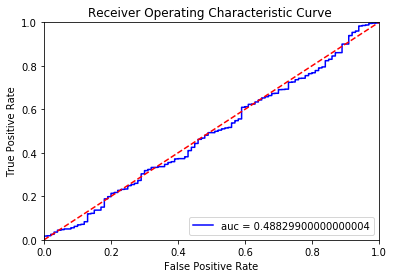

In [36]:
# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic Curve ')
plt.plot(FPR_a, TPR_a, 'b',label = 'auc = 0.48829900000000004')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2) 5_b data

In [37]:
b_data = pd.read_csv("5_b.csv")

In [38]:
print(b_data.head(5))

     y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648


In [39]:
print("Number of data points :", b_data.shape)
print("The attribute of data :", b_data.columns)

Number of data points : (10100, 2)
The attribute of data : Index(['y', 'proba'], dtype='object')


### 1. Computation of y_score for 5_a data : 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < 0.5 else 1] , Threshold = 0.5

In [40]:
probability_b = list(b_data['proba'].values)
threshold_value = 0.5

y_predicted_list_2 = generate_Y_predicted(probability_b,threshold_value)

b_data['Y predicted 1 '] = y_predicted_list_2
#a_data.drop(['proba'], axis=1, inplace=True )
b_data.head(5)

,y,proba,Y predicted 1
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [41]:
# confusion matrix 

TP_b,FN_b,FP_b,TN_b = confusion_matrix_calculation(b_data['y'],b_data['Y predicted 1 '])
matrix = np.array([[TN_b,FP_b],[FN_b,TP_b]])
print("The Confusion matrix for 5_b_data : ")
print(matrix)

The Confusion matrix for 5_b_data : 
[[9761  239]
 [  45   55]]


In [42]:
# TPR, FPR, precision, f1, accuracy
recall_score_b = TP_b / (TP_b + FN_b)
precision_score_b = TP_b / ( TP_b + FP_b )

f1_score_b = (2 *(precision_score_b * recall_score_b)) / (precision_score_b + recall_score_b)
print("The f1 score for 5_b data is :",f1_score_b)

acc_score_b = (TP_b +TN_b) / (TP_b + FN_b + FP_b + TN_b)
print("The accuracy Score for 5_b_data :",acc_score_b)

The f1 score for 5_b data is : 0.2791878172588833
The accuracy Score for 5_b_data : 0.9718811881188119


# 2.calculation of threshold values for b_data

In [43]:
# Threshold list
Threshold_list_b = []
for r in b_data['proba']:
    if r in Threshold_list_b :
        continue
    else:
        Threshold_list_b.append(r)

In [44]:
sorted_threshold_list_b = np.sort(Threshold_list_b)
print(len(sorted_threshold_list_b))

10100


In [45]:
# computation of y score for different threshold values :
for r in range(len(sorted_threshold_list_b)) :
    y_predicted_list = generate_Y_predicted(probability_b,sorted_threshold_list_b[r])
    b_data['Y predicted '+str(r)] = y_predicted_list

In [46]:
b_data.shape

(10100, 10103)

In [47]:
# confusion Matrix 
TP_b = []
FN_b= []
FP_b =[]
TN_b= []
for r in range(len(sorted_threshold_list_b)):
    tp,fn,fp,tn = confusion_matrix_calculation(b_data['y'],b_data['Y predicted '+str(r)])
    TP_b.append(tp)
    FN_b.append(fn)
    FP_b.append(fp)
    TN_b.append(tn)  

In [48]:
print(len(TP_b))
print(len(FN_b))
print(len(FP_b))
print(len(TN_b))

10100
10100
10100
10100


In [49]:
print("The Confusion matrix for 5_b_data with all the threshold values : ")
for r in range(len(sorted_threshold_list_b)):
    matrix = np.array([[TN_b[r],FP_b[r]],[FN_b[r],TP_b[r]]])
    print("matrix for ",sorted_threshold_list_b[r])
    print(matrix)

The Confusion matrix for 5_b_data with all the threshold values : 
matrix for  0.10000141285578913
[[    0 10000]
 [    0   100]]
matrix for  0.10016080437256432
[[   1 9999]
 [   0  100]]
matrix for  0.10016507626754403
[[   2 9998]
 [   0  100]]
matrix for  0.10018885836254708
[[   3 9997]
 [   0  100]]
matrix for  0.10022970009062958
[[   4 9996]
 [   0  100]]
matrix for  0.1002421268327976
[[   5 9995]
 [   0  100]]
matrix for  0.10024743027210822
[[   6 9994]
 [   0  100]]
matrix for  0.10030373243093957
[[   7 9993]
 [   0  100]]
matrix for  0.1003371449874035
[[   8 9992]
 [   0  100]]
matrix for  0.10039740418217284
[[   9 9991]
 [   0  100]]
matrix for  0.1004523331576671
[[  10 9990]
 [   0  100]]
matrix for  0.10055346490092627
[[  11 9989]
 [   0  100]]
matrix for  0.10059719007313364
[[  12 9988]
 [   0  100]]
matrix for  0.10062033330084603
[[  13 9987]
 [   0  100]]
matrix for  0.1006760243517772
[[  14 9986]
 [   0  100]]
matrix for  0.10069841498900936
[[  15 9985]
 [ 

matrix for  0.11053513887643394
[[ 244 9756]
 [   0  100]]
matrix for  0.11057215406639777
[[ 245 9755]
 [   0  100]]
matrix for  0.11059101457686753
[[ 246 9754]
 [   0  100]]
matrix for  0.11060413984626907
[[ 247 9753]
 [   0  100]]
matrix for  0.11069210600579682
[[ 248 9752]
 [   0  100]]
matrix for  0.11072275414520223
[[ 249 9751]
 [   0  100]]
matrix for  0.11074457728450887
[[ 250 9750]
 [   0  100]]
matrix for  0.11077211775584364
[[ 251 9749]
 [   0  100]]
matrix for  0.11078838909172294
[[ 252 9748]
 [   0  100]]
matrix for  0.11083570903137764
[[ 253 9747]
 [   0  100]]
matrix for  0.11084185981864783
[[ 254 9746]
 [   0  100]]
matrix for  0.11092149324836532
[[ 255 9745]
 [   0  100]]
matrix for  0.11097719191767384
[[ 256 9744]
 [   0  100]]
matrix for  0.11106040763434816
[[ 257 9743]
 [   0  100]]
matrix for  0.11108176673106873
[[ 258 9742]
 [   0  100]]
matrix for  0.11115984640952252
[[ 259 9741]
 [   0  100]]
matrix for  0.11123695700168054
[[ 260 9740]
 [   0  100

matrix for  0.1192444095867603
[[ 483 9517]
 [   0  100]]
matrix for  0.11925430204544475
[[ 484 9516]
 [   0  100]]
matrix for  0.11929691719348913
[[ 485 9515]
 [   0  100]]
matrix for  0.11935232772800408
[[ 486 9514]
 [   0  100]]
matrix for  0.11935863804378526
[[ 487 9513]
 [   0  100]]
matrix for  0.11937160115198898
[[ 488 9512]
 [   0  100]]
matrix for  0.11940755276569183
[[ 489 9511]
 [   0  100]]
matrix for  0.1194885342762708
[[ 490 9510]
 [   0  100]]
matrix for  0.11951057021728707
[[ 491 9509]
 [   0  100]]
matrix for  0.1195242495311156
[[ 492 9508]
 [   0  100]]
matrix for  0.11954013712927715
[[ 493 9507]
 [   0  100]]
matrix for  0.11954366503932574
[[ 494 9506]
 [   0  100]]
matrix for  0.1196499007192476
[[ 495 9505]
 [   0  100]]
matrix for  0.11976089486086065
[[ 496 9504]
 [   0  100]]
matrix for  0.11977951653483256
[[ 497 9503]
 [   0  100]]
matrix for  0.11983016748140946
[[ 498 9502]
 [   0  100]]
matrix for  0.11985805240629115
[[ 499 9501]
 [   0  100]]
m

[[ 726 9274]
 [   0  100]]
matrix for  0.13020294233582747
[[ 727 9273]
 [   0  100]]
matrix for  0.13020979445005595
[[ 728 9272]
 [   0  100]]
matrix for  0.13021136292692148
[[ 729 9271]
 [   0  100]]
matrix for  0.13022502231325014
[[ 730 9270]
 [   0  100]]
matrix for  0.1302349019668108
[[ 731 9269]
 [   0  100]]
matrix for  0.13024820979582094
[[ 732 9268]
 [   0  100]]
matrix for  0.13030404431177592
[[ 733 9267]
 [   0  100]]
matrix for  0.13030562783687544
[[ 734 9266]
 [   0  100]]
matrix for  0.13035816531851988
[[ 735 9265]
 [   0  100]]
matrix for  0.1303672236133318
[[ 736 9264]
 [   0  100]]
matrix for  0.130467143395391
[[ 737 9263]
 [   0  100]]
matrix for  0.1305033396530255
[[ 738 9262]
 [   0  100]]
matrix for  0.13052553494235358
[[ 739 9261]
 [   0  100]]
matrix for  0.1305619402023212
[[ 740 9260]
 [   0  100]]
matrix for  0.130647401916974
[[ 741 9259]
 [   0  100]]
matrix for  0.13066392198152466
[[ 742 9258]
 [   0  100]]
matrix for  0.130680862147406
[[ 743 

matrix for  0.13918679349309326
[[ 976 9024]
 [   0  100]]
matrix for  0.1392368359629351
[[ 977 9023]
 [   0  100]]
matrix for  0.13927754045562202
[[ 978 9022]
 [   0  100]]
matrix for  0.1392890755678001
[[ 979 9021]
 [   0  100]]
matrix for  0.13929867681626545
[[ 980 9020]
 [   0  100]]
matrix for  0.1393033013127299
[[ 981 9019]
 [   0  100]]
matrix for  0.1393171903681563
[[ 982 9018]
 [   0  100]]
matrix for  0.13932810775932788
[[ 983 9017]
 [   0  100]]
matrix for  0.13933095448030944
[[ 984 9016]
 [   0  100]]
matrix for  0.139346935996537
[[ 985 9015]
 [   0  100]]
matrix for  0.13936420537518066
[[ 986 9014]
 [   0  100]]
matrix for  0.1395093054362124
[[ 987 9013]
 [   0  100]]
matrix for  0.13951274796533653
[[ 988 9012]
 [   0  100]]
matrix for  0.1396265481913832
[[ 989 9011]
 [   0  100]]
matrix for  0.13970779225291974
[[ 990 9010]
 [   0  100]]
matrix for  0.13973500907040298
[[ 991 9009]
 [   0  100]]
matrix for  0.1397398186463819
[[ 992 9008]
 [   0  100]]
matrix

[[1216 8784]
 [   0  100]]
matrix for  0.14860848734395174
[[1217 8783]
 [   0  100]]
matrix for  0.14869942234302955
[[1218 8782]
 [   0  100]]
matrix for  0.14871761164485653
[[1219 8781]
 [   0  100]]
matrix for  0.1489037573401594
[[1220 8780]
 [   0  100]]
matrix for  0.14890463831545905
[[1221 8779]
 [   0  100]]
matrix for  0.1491591679310251
[[1222 8778]
 [   0  100]]
matrix for  0.14919568120998844
[[1223 8777]
 [   0  100]]
matrix for  0.14923448828483996
[[1224 8776]
 [   0  100]]
matrix for  0.14926887192021376
[[1225 8775]
 [   0  100]]
matrix for  0.1492712519903252
[[1226 8774]
 [   0  100]]
matrix for  0.1493115785701079
[[1227 8773]
 [   0  100]]
matrix for  0.14936708439490498
[[1228 8772]
 [   0  100]]
matrix for  0.14938197781800866
[[1229 8771]
 [   0  100]]
matrix for  0.14940459361210526
[[1230 8770]
 [   0  100]]
matrix for  0.1494800439803172
[[1231 8769]
 [   0  100]]
matrix for  0.14952326532949042
[[1232 8768]
 [   0  100]]
matrix for  0.14960690025225615
[[

[[1469 8531]
 [   0  100]]
matrix for  0.15908978034642604
[[1470 8530]
 [   0  100]]
matrix for  0.15911347190852254
[[1471 8529]
 [   0  100]]
matrix for  0.1591420597058399
[[1472 8528]
 [   0  100]]
matrix for  0.15925088548692276
[[1473 8527]
 [   0  100]]
matrix for  0.1594760982517443
[[1474 8526]
 [   0  100]]
matrix for  0.15951495452809178
[[1475 8525]
 [   0  100]]
matrix for  0.1595623254491612
[[1476 8524]
 [   0  100]]
matrix for  0.15958131429310987
[[1477 8523]
 [   0  100]]
matrix for  0.15958528508152378
[[1478 8522]
 [   0  100]]
matrix for  0.1596227773462512
[[1479 8521]
 [   0  100]]
matrix for  0.15970071132749822
[[1480 8520]
 [   0  100]]
matrix for  0.15971016011272227
[[1481 8519]
 [   0  100]]
matrix for  0.1597845225948345
[[1482 8518]
 [   0  100]]
matrix for  0.15982659693558682
[[1483 8517]
 [   0  100]]
matrix for  0.15983629177117398
[[1484 8516]
 [   0  100]]
matrix for  0.1598381572122501
[[1485 8515]
 [   0  100]]
matrix for  0.159880967276119
[[148

matrix for  0.17052078344138394
[[1757 8243]
 [   0  100]]
matrix for  0.17054542017674612
[[1758 8242]
 [   0  100]]
matrix for  0.1705833331453977
[[1759 8241]
 [   0  100]]
matrix for  0.17061378596148866
[[1760 8240]
 [   0  100]]
matrix for  0.17065642999358216
[[1761 8239]
 [   0  100]]
matrix for  0.17074144043683726
[[1762 8238]
 [   0  100]]
matrix for  0.17074476395097002
[[1763 8237]
 [   0  100]]
matrix for  0.1707616286076266
[[1764 8236]
 [   0  100]]
matrix for  0.1708330125297333
[[1765 8235]
 [   0  100]]
matrix for  0.1708496991946177
[[1766 8234]
 [   0  100]]
matrix for  0.17085159349900642
[[1767 8233]
 [   0  100]]
matrix for  0.17086793271930836
[[1768 8232]
 [   0  100]]
matrix for  0.17091705578869326
[[1769 8231]
 [   0  100]]
matrix for  0.17094337738785792
[[1770 8230]
 [   0  100]]
matrix for  0.17094681702721126
[[1771 8229]
 [   0  100]]
matrix for  0.17094763759402254
[[1772 8228]
 [   0  100]]
matrix for  0.17096707005603895
[[1773 8227]
 [   0  100]]
m

[[1981 8019]
 [   0  100]]
matrix for  0.17898341362226916
[[1982 8018]
 [   0  100]]
matrix for  0.17912424308062827
[[1983 8017]
 [   0  100]]
matrix for  0.1791365879569682
[[1984 8016]
 [   0  100]]
matrix for  0.17918337643892968
[[1985 8015]
 [   0  100]]
matrix for  0.17920598721008435
[[1986 8014]
 [   0  100]]
matrix for  0.17923482791615405
[[1987 8013]
 [   0  100]]
matrix for  0.1792606580351594
[[1988 8012]
 [   0  100]]
matrix for  0.17928021479834033
[[1989 8011]
 [   0  100]]
matrix for  0.17930108462230726
[[1990 8010]
 [   0  100]]
matrix for  0.1793046356851113
[[1991 8009]
 [   0  100]]
matrix for  0.17932674501319112
[[1992 8008]
 [   0  100]]
matrix for  0.1793940629447689
[[1993 8007]
 [   0  100]]
matrix for  0.17941355891345326
[[1994 8006]
 [   0  100]]
matrix for  0.17947173183763865
[[1995 8005]
 [   0  100]]
matrix for  0.1794929345791356
[[1996 8004]
 [   0  100]]
matrix for  0.17953642226475414
[[1997 8003]
 [   0  100]]
matrix for  0.17955301828253456
[[

 [   0  100]]
matrix for  0.18923583062964405
[[2247 7753]
 [   0  100]]
matrix for  0.18945381965619665
[[2248 7752]
 [   0  100]]
matrix for  0.18945811961239184
[[2249 7751]
 [   0  100]]
matrix for  0.1894639212692525
[[2250 7750]
 [   0  100]]
matrix for  0.18967201865618705
[[2251 7749]
 [   0  100]]
matrix for  0.18970845490974114
[[2252 7748]
 [   0  100]]
matrix for  0.18971869859562807
[[2253 7747]
 [   0  100]]
matrix for  0.18973751597374766
[[2254 7746]
 [   0  100]]
matrix for  0.18974704210618654
[[2255 7745]
 [   0  100]]
matrix for  0.18979766649385266
[[2256 7744]
 [   0  100]]
matrix for  0.18980483437711768
[[2257 7743]
 [   0  100]]
matrix for  0.18982891910737956
[[2258 7742]
 [   0  100]]
matrix for  0.18984728419608246
[[2259 7741]
 [   0  100]]
matrix for  0.1898514304751172
[[2260 7740]
 [   0  100]]
matrix for  0.1898766591062732
[[2261 7739]
 [   0  100]]
matrix for  0.18991192517477595
[[2262 7738]
 [   0  100]]
matrix for  0.18992651346346454
[[2263 7737]


matrix for  0.2000713506072478
[[2503 7497]
 [   0  100]]
matrix for  0.2000794438787264
[[2504 7496]
 [   0  100]]
matrix for  0.2001046229060237
[[2505 7495]
 [   0  100]]
matrix for  0.20011324104967126
[[2506 7494]
 [   0  100]]
matrix for  0.20012547614869425
[[2507 7493]
 [   0  100]]
matrix for  0.20026417028246604
[[2508 7492]
 [   0  100]]
matrix for  0.2002731457054457
[[2509 7491]
 [   0  100]]
matrix for  0.20031450900048606
[[2510 7490]
 [   0  100]]
matrix for  0.20034685033102884
[[2511 7489]
 [   0  100]]
matrix for  0.2004933061680277
[[2512 7488]
 [   0  100]]
matrix for  0.2005415618408864
[[2513 7487]
 [   0  100]]
matrix for  0.2006087961965317
[[2514 7486]
 [   0  100]]
matrix for  0.20071335811977434
[[2515 7485]
 [   0  100]]
matrix for  0.2007232086060406
[[2516 7484]
 [   0  100]]
matrix for  0.20072981794057101
[[2517 7483]
 [   0  100]]
matrix for  0.2007439225411294
[[2518 7482]
 [   0  100]]
matrix for  0.20079905418623195
[[2519 7481]
 [   0  100]]
matrix

matrix for  0.2103924749197511
[[2767 7233]
 [   0  100]]
matrix for  0.21053179758314636
[[2768 7232]
 [   0  100]]
matrix for  0.21062547306988794
[[2769 7231]
 [   0  100]]
matrix for  0.21064086706523236
[[2770 7230]
 [   0  100]]
matrix for  0.21066112628308253
[[2771 7229]
 [   0  100]]
matrix for  0.21066132880103056
[[2772 7228]
 [   0  100]]
matrix for  0.21068915212527614
[[2773 7227]
 [   0  100]]
matrix for  0.2107180107116776
[[2774 7226]
 [   0  100]]
matrix for  0.21072892590521253
[[2775 7225]
 [   0  100]]
matrix for  0.21074755524762886
[[2776 7224]
 [   0  100]]
matrix for  0.21075196561398366
[[2777 7223]
 [   0  100]]
matrix for  0.21075627718510187
[[2778 7222]
 [   0  100]]
matrix for  0.2107977888929063
[[2779 7221]
 [   0  100]]
matrix for  0.2108583765054878
[[2780 7220]
 [   0  100]]
matrix for  0.2109595795487532
[[2781 7219]
 [   0  100]]
matrix for  0.2109654033563308
[[2782 7218]
 [   0  100]]
matrix for  0.21097998716312266
[[2783 7217]
 [   0  100]]
mat

 [   0  100]]
matrix for  0.21986895561375205
[[2998 7002]
 [   0  100]]
matrix for  0.21989630656280784
[[2999 7001]
 [   0  100]]
matrix for  0.21995078184562974
[[3000 7000]
 [   0  100]]
matrix for  0.219959613833294
[[3001 6999]
 [   0  100]]
matrix for  0.21998863312346928
[[3002 6998]
 [   0  100]]
matrix for  0.2201462697312241
[[3003 6997]
 [   0  100]]
matrix for  0.22016295052088475
[[3004 6996]
 [   0  100]]
matrix for  0.22025322036663808
[[3005 6995]
 [   0  100]]
matrix for  0.22034342186970424
[[3006 6994]
 [   0  100]]
matrix for  0.2204116554020309
[[3007 6993]
 [   0  100]]
matrix for  0.22047170433328064
[[3008 6992]
 [   0  100]]
matrix for  0.22051257639843824
[[3009 6991]
 [   0  100]]
matrix for  0.2205943272531765
[[3010 6990]
 [   0  100]]
matrix for  0.220663467843142
[[3011 6989]
 [   0  100]]
matrix for  0.22069711784348767
[[3012 6988]
 [   0  100]]
matrix for  0.22070396592615787
[[3013 6987]
 [   0  100]]
matrix for  0.22073352098989152
[[3014 6986]
 [  

matrix for  0.22933802581095875
[[3242 6758]
 [   0  100]]
matrix for  0.22936592102254774
[[3243 6757]
 [   0  100]]
matrix for  0.2294003299562697
[[3244 6756]
 [   0  100]]
matrix for  0.2294136342493392
[[3245 6755]
 [   0  100]]
matrix for  0.22941946872567825
[[3246 6754]
 [   0  100]]
matrix for  0.2294244556495671
[[3247 6753]
 [   0  100]]
matrix for  0.22959876384547356
[[3248 6752]
 [   0  100]]
matrix for  0.22960379423626645
[[3249 6751]
 [   0  100]]
matrix for  0.229680974754726
[[3250 6750]
 [   0  100]]
matrix for  0.22969643030228545
[[3251 6749]
 [   0  100]]
matrix for  0.22979756223276576
[[3252 6748]
 [   0  100]]
matrix for  0.2297979965630188
[[3253 6747]
 [   0  100]]
matrix for  0.22980511694799785
[[3254 6746]
 [   0  100]]
matrix for  0.2298096054066603
[[3255 6745]
 [   0  100]]
matrix for  0.2298294788443524
[[3256 6744]
 [   0  100]]
matrix for  0.2298437894787869
[[3257 6743]
 [   0  100]]
matrix for  0.22986969903247625
[[3258 6742]
 [   0  100]]
matrix

matrix for  0.2425620305459745
[[3582 6418]
 [   0  100]]
matrix for  0.24261573343994985
[[3583 6417]
 [   0  100]]
matrix for  0.2426601503408023
[[3584 6416]
 [   0  100]]
matrix for  0.24266123438161644
[[3585 6415]
 [   0  100]]
matrix for  0.24268712040047025
[[3586 6414]
 [   0  100]]
matrix for  0.2427151967138315
[[3587 6413]
 [   0  100]]
matrix for  0.24272859762840765
[[3588 6412]
 [   0  100]]
matrix for  0.2427406165385476
[[3589 6411]
 [   0  100]]
matrix for  0.2427471296058197
[[3590 6410]
 [   0  100]]
matrix for  0.24276080682866474
[[3591 6409]
 [   0  100]]
matrix for  0.2428677405540498
[[3592 6408]
 [   0  100]]
matrix for  0.2429448643258595
[[3593 6407]
 [   0  100]]
matrix for  0.24311120398791666
[[3594 6406]
 [   0  100]]
matrix for  0.24314581246170625
[[3595 6405]
 [   0  100]]
matrix for  0.2432052095467443
[[3596 6404]
 [   0  100]]
matrix for  0.2432332177667632
[[3597 6403]
 [   0  100]]
matrix for  0.2433602764168089
[[3598 6402]
 [   0  100]]
matrix 

matrix for  0.25318837704750746
[[3810 6190]
 [   0  100]]
matrix for  0.2532111769458957
[[3811 6189]
 [   0  100]]
matrix for  0.2532513369206809
[[3812 6188]
 [   0  100]]
matrix for  0.2532567804578569
[[3813 6187]
 [   0  100]]
matrix for  0.2532837245520622
[[3814 6186]
 [   0  100]]
matrix for  0.2532846646336162
[[3815 6185]
 [   0  100]]
matrix for  0.2533021518264436
[[3816 6184]
 [   0  100]]
matrix for  0.2533162433199431
[[3817 6183]
 [   0  100]]
matrix for  0.2533556564843221
[[3818 6182]
 [   0  100]]
matrix for  0.2533565008715135
[[3819 6181]
 [   0  100]]
matrix for  0.25338489343357995
[[3820 6180]
 [   0  100]]
matrix for  0.2533906837719474
[[3821 6179]
 [   0  100]]
matrix for  0.2534454166869509
[[3822 6178]
 [   0  100]]
matrix for  0.2534617324759764
[[3823 6177]
 [   0  100]]
matrix for  0.25348801112134045
[[3824 6176]
 [   0  100]]
matrix for  0.2534893324651475
[[3825 6175]
 [   0  100]]
matrix for  0.253489916319924
[[3826 6174]
 [   0  100]]
matrix for  

matrix for  0.263041035956376
[[4072 5928]
 [   0  100]]
matrix for  0.26305987955811994
[[4073 5927]
 [   0  100]]
matrix for  0.2631604153349165
[[4074 5926]
 [   0  100]]
matrix for  0.26327164587305146
[[4075 5925]
 [   0  100]]
matrix for  0.2632800297435475
[[4076 5924]
 [   0  100]]
matrix for  0.2632818952401373
[[4077 5923]
 [   0  100]]
matrix for  0.2633341100269667
[[4078 5922]
 [   0  100]]
matrix for  0.2633532178846466
[[4079 5921]
 [   0  100]]
matrix for  0.26337793441733137
[[4080 5920]
 [   0  100]]
matrix for  0.2635666656391388
[[4081 5919]
 [   0  100]]
matrix for  0.2636095124426884
[[4082 5918]
 [   0  100]]
matrix for  0.2636437595525111
[[4083 5917]
 [   0  100]]
matrix for  0.26365816845813306
[[4084 5916]
 [   0  100]]
matrix for  0.26367401537481416
[[4085 5915]
 [   0  100]]
matrix for  0.2637791900075155
[[4086 5914]
 [   0  100]]
matrix for  0.2638189711244789
[[4087 5913]
 [   0  100]]
matrix for  0.26384713175546115
[[4088 5912]
 [   0  100]]
matrix fo

[[4315 5685]
 [   0  100]]
matrix for  0.27372176871197473
[[4316 5684]
 [   0  100]]
matrix for  0.2737346450656727
[[4317 5683]
 [   0  100]]
matrix for  0.27376143815238085
[[4318 5682]
 [   0  100]]
matrix for  0.27377152387885184
[[4319 5681]
 [   0  100]]
matrix for  0.273771649698209
[[4320 5680]
 [   0  100]]
matrix for  0.2738162803835911
[[4321 5679]
 [   0  100]]
matrix for  0.2738264399699386
[[4322 5678]
 [   0  100]]
matrix for  0.2738990329383469
[[4323 5677]
 [   0  100]]
matrix for  0.27397534676364066
[[4324 5676]
 [   0  100]]
matrix for  0.27403879128519004
[[4325 5675]
 [   0  100]]
matrix for  0.27410609998506563
[[4326 5674]
 [   0  100]]
matrix for  0.2741218573979928
[[4327 5673]
 [   0  100]]
matrix for  0.27413312787706423
[[4328 5672]
 [   0  100]]
matrix for  0.27416634475189794
[[4329 5671]
 [   0  100]]
matrix for  0.2742868572053781
[[4330 5670]
 [   0  100]]
matrix for  0.2743746222902289
[[4331 5669]
 [   0  100]]
matrix for  0.27437926622882425
[[4332

 [   0  100]]
matrix for  0.2839627911758649
[[4575 5425]
 [   0  100]]
matrix for  0.28398184386455383
[[4576 5424]
 [   0  100]]
matrix for  0.28399812608840463
[[4577 5423]
 [   0  100]]
matrix for  0.2840630956973784
[[4578 5422]
 [   0  100]]
matrix for  0.28408087662090464
[[4579 5421]
 [   0  100]]
matrix for  0.2841337827376105
[[4580 5420]
 [   0  100]]
matrix for  0.28413976347003256
[[4581 5419]
 [   0  100]]
matrix for  0.2841473706725829
[[4582 5418]
 [   0  100]]
matrix for  0.2841565674013205
[[4583 5417]
 [   0  100]]
matrix for  0.2841597681652941
[[4584 5416]
 [   0  100]]
matrix for  0.28417934774625386
[[4585 5415]
 [   0  100]]
matrix for  0.28418647303040034
[[4586 5414]
 [   0  100]]
matrix for  0.2841920681133093
[[4587 5413]
 [   0  100]]
matrix for  0.28435918762097623
[[4588 5412]
 [   0  100]]
matrix for  0.284501667920323
[[4589 5411]
 [   0  100]]
matrix for  0.2845172564254388
[[4590 5410]
 [   0  100]]
matrix for  0.2845467233894557
[[4591 5409]
 [   0  

[[4828 5172]
 [   0  100]]
matrix for  0.2942545459419791
[[4829 5171]
 [   0  100]]
matrix for  0.2942572861853246
[[4830 5170]
 [   0  100]]
matrix for  0.29432459343922385
[[4831 5169]
 [   0  100]]
matrix for  0.294361502792439
[[4832 5168]
 [   0  100]]
matrix for  0.2943773469402225
[[4833 5167]
 [   0  100]]
matrix for  0.2943882773702962
[[4834 5166]
 [   0  100]]
matrix for  0.2945000936002353
[[4835 5165]
 [   0  100]]
matrix for  0.2945199359444329
[[4836 5164]
 [   0  100]]
matrix for  0.2945723141841132
[[4837 5163]
 [   0  100]]
matrix for  0.29461993656430496
[[4838 5162]
 [   0  100]]
matrix for  0.2946580942478827
[[4839 5161]
 [   0  100]]
matrix for  0.2947021745674453
[[4840 5160]
 [   0  100]]
matrix for  0.2948363422676569
[[4841 5159]
 [   0  100]]
matrix for  0.2948469753468556
[[4842 5158]
 [   0  100]]
matrix for  0.2948558273370003
[[4843 5157]
 [   0  100]]
matrix for  0.2948567289491353
[[4844 5156]
 [   0  100]]
matrix for  0.2949303319666413
[[4845 5155]


 [   0  100]]
matrix for  0.3055725132788039
[[5105 4895]
 [   0  100]]
matrix for  0.30557967746865744
[[5106 4894]
 [   0  100]]
matrix for  0.30560272281346657
[[5107 4893]
 [   0  100]]
matrix for  0.3056295895196417
[[5108 4892]
 [   0  100]]
matrix for  0.3056423356116691
[[5109 4891]
 [   0  100]]
matrix for  0.3057300977854259
[[5110 4890]
 [   0  100]]
matrix for  0.3058001325916821
[[5111 4889]
 [   0  100]]
matrix for  0.3059256115742025
[[5112 4888]
 [   0  100]]
matrix for  0.3059435856429249
[[5113 4887]
 [   0  100]]
matrix for  0.30597159437127985
[[5114 4886]
 [   0  100]]
matrix for  0.3059940792792363
[[5115 4885]
 [   0  100]]
matrix for  0.3060122254114315
[[5116 4884]
 [   0  100]]
matrix for  0.30603508525055306
[[5117 4883]
 [   0  100]]
matrix for  0.3060939480987779
[[5118 4882]
 [   0  100]]
matrix for  0.3061185363900032
[[5119 4881]
 [   0  100]]
matrix for  0.30611957790416444
[[5120 4880]
 [   0  100]]
matrix for  0.30613598013793
[[5121 4879]
 [   0  100

matrix for  0.31827346408474266
[[5374 4626]
 [   0  100]]
matrix for  0.3182964673315225
[[5375 4625]
 [   0  100]]
matrix for  0.3183202667393777
[[5376 4624]
 [   0  100]]
matrix for  0.3183516557848531
[[5377 4623]
 [   0  100]]
matrix for  0.3183547667943566
[[5378 4622]
 [   0  100]]
matrix for  0.31843571013638083
[[5379 4621]
 [   0  100]]
matrix for  0.31844578478460944
[[5380 4620]
 [   0  100]]
matrix for  0.3187005617252534
[[5381 4619]
 [   0  100]]
matrix for  0.31873213894943553
[[5382 4618]
 [   0  100]]
matrix for  0.3187795145187801
[[5383 4617]
 [   0  100]]
matrix for  0.3188733532286071
[[5384 4616]
 [   0  100]]
matrix for  0.3189684662482101
[[5385 4615]
 [   0  100]]
matrix for  0.3190177765300879
[[5386 4614]
 [   0  100]]
matrix for  0.3190350441131069
[[5387 4613]
 [   0  100]]
matrix for  0.3190375068304114
[[5388 4612]
 [   0  100]]
matrix for  0.31904610651112925
[[5389 4611]
 [   0  100]]
matrix for  0.3190944097215622
[[5390 4610]
 [   0  100]]
matrix fo

matrix for  0.3271836353726835
[[5577 4423]
 [   0  100]]
matrix for  0.3271866857419564
[[5578 4422]
 [   0  100]]
matrix for  0.3271897840807809
[[5579 4421]
 [   0  100]]
matrix for  0.3273032281498546
[[5580 4420]
 [   0  100]]
matrix for  0.3274762315648909
[[5581 4419]
 [   0  100]]
matrix for  0.3275284144944081
[[5582 4418]
 [   0  100]]
matrix for  0.3275488853544175
[[5583 4417]
 [   0  100]]
matrix for  0.3275861737745435
[[5584 4416]
 [   0  100]]
matrix for  0.3276409460860545
[[5585 4415]
 [   0  100]]
matrix for  0.32769361887081805
[[5586 4414]
 [   0  100]]
matrix for  0.3277120047528248
[[5587 4413]
 [   0  100]]
matrix for  0.327720092958274
[[5588 4412]
 [   0  100]]
matrix for  0.3277203805395379
[[5589 4411]
 [   0  100]]
matrix for  0.327872712445942
[[5590 4410]
 [   0  100]]
matrix for  0.32789633510061844
[[5591 4409]
 [   0  100]]
matrix for  0.327940154003844
[[5592 4408]
 [   0  100]]
matrix for  0.3280816597476036
[[5593 4407]
 [   0  100]]
matrix for  0.3

matrix for  0.33911534885791494
[[5846 4154]
 [   0  100]]
matrix for  0.33919806902280314
[[5847 4153]
 [   0  100]]
matrix for  0.3392279008014933
[[5848 4152]
 [   0  100]]
matrix for  0.33925262745488205
[[5849 4151]
 [   0  100]]
matrix for  0.3393026248215386
[[5850 4150]
 [   0  100]]
matrix for  0.33930776726196826
[[5851 4149]
 [   0  100]]
matrix for  0.33957531987146616
[[5852 4148]
 [   0  100]]
matrix for  0.3397025524605464
[[5853 4147]
 [   0  100]]
matrix for  0.3397910411208045
[[5854 4146]
 [   0  100]]
matrix for  0.3398032372470925
[[5855 4145]
 [   0  100]]
matrix for  0.3399002198558017
[[5856 4144]
 [   0  100]]
matrix for  0.3399322305586455
[[5857 4143]
 [   0  100]]
matrix for  0.3400054959553861
[[5858 4142]
 [   0  100]]
matrix for  0.3400133510804172
[[5859 4141]
 [   0  100]]
matrix for  0.340046121993753
[[5860 4140]
 [   0  100]]
matrix for  0.3400463959428564
[[5861 4139]
 [   0  100]]
matrix for  0.34005748597716445
[[5862 4138]
 [   0  100]]
matrix fo

 [   0  100]]
matrix for  0.35079173794530805
[[6128 3872]
 [   0  100]]
matrix for  0.3508107446684682
[[6129 3871]
 [   0  100]]
matrix for  0.3508367024128313
[[6130 3870]
 [   0  100]]
matrix for  0.3508899049572122
[[6131 3869]
 [   0  100]]
matrix for  0.3509146502941046
[[6132 3868]
 [   0  100]]
matrix for  0.35094265981318506
[[6133 3867]
 [   0  100]]
matrix for  0.35101954902285826
[[6134 3866]
 [   0  100]]
matrix for  0.3510498933401096
[[6135 3865]
 [   0  100]]
matrix for  0.35105118629419063
[[6136 3864]
 [   0  100]]
matrix for  0.3512299547982253
[[6137 3863]
 [   0  100]]
matrix for  0.35131574990111425
[[6138 3862]
 [   0  100]]
matrix for  0.35134420290029045
[[6139 3861]
 [   0  100]]
matrix for  0.3513543538329976
[[6140 3860]
 [   0  100]]
matrix for  0.35145457193486185
[[6141 3859]
 [   0  100]]
matrix for  0.3515818196657137
[[6142 3858]
 [   0  100]]
matrix for  0.3515887563490457
[[6143 3857]
 [   0  100]]
matrix for  0.3516065492625328
[[6144 3856]
 [   0 

matrix for  0.3608561310484286
[[6374 3626]
 [   0  100]]
matrix for  0.36086259527804604
[[6375 3625]
 [   0  100]]
matrix for  0.3608924144627398
[[6376 3624]
 [   0  100]]
matrix for  0.3608957513652479
[[6377 3623]
 [   0  100]]
matrix for  0.3609073860576005
[[6378 3622]
 [   0  100]]
matrix for  0.3609226174349629
[[6379 3621]
 [   0  100]]
matrix for  0.3610120514097791
[[6380 3620]
 [   0  100]]
matrix for  0.3610150139379173
[[6381 3619]
 [   0  100]]
matrix for  0.3610615895809782
[[6382 3618]
 [   0  100]]
matrix for  0.3611086978395134
[[6383 3617]
 [   0  100]]
matrix for  0.3611532187358189
[[6384 3616]
 [   0  100]]
matrix for  0.36119661957676574
[[6385 3615]
 [   0  100]]
matrix for  0.3611997984231663
[[6386 3614]
 [   0  100]]
matrix for  0.36121564330960376
[[6387 3613]
 [   0  100]]
matrix for  0.3612868627545433
[[6388 3612]
 [   0  100]]
matrix for  0.3612992336989841
[[6389 3611]
 [   0  100]]
matrix for  0.3613034941014134
[[6390 3610]
 [   0  100]]
matrix for 

 [   0  100]]
matrix for  0.3717103658932744
[[6638 3362]
 [   0  100]]
matrix for  0.3717748541285407
[[6639 3361]
 [   0  100]]
matrix for  0.3718492503241193
[[6640 3360]
 [   0  100]]
matrix for  0.3718963423317199
[[6641 3359]
 [   0  100]]
matrix for  0.3719081770219416
[[6642 3358]
 [   0  100]]
matrix for  0.3719115392523397
[[6643 3357]
 [   0  100]]
matrix for  0.3719239514775053
[[6644 3356]
 [   0  100]]
matrix for  0.3719654599860185
[[6645 3355]
 [   0  100]]
matrix for  0.3719972623819319
[[6646 3354]
 [   0  100]]
matrix for  0.37200801272871004
[[6647 3353]
 [   0  100]]
matrix for  0.37207817782427344
[[6648 3352]
 [   0  100]]
matrix for  0.3721550629884065
[[6649 3351]
 [   0  100]]
matrix for  0.3722573587330992
[[6650 3350]
 [   0  100]]
matrix for  0.37226116298363976
[[6651 3349]
 [   0  100]]
matrix for  0.37226758524395454
[[6652 3348]
 [   0  100]]
matrix for  0.3723621835557985
[[6653 3347]
 [   0  100]]
matrix for  0.37241512239200536
[[6654 3346]
 [   0  1

matrix for  0.3821150501434626
[[6899 3101]
 [   0  100]]
matrix for  0.3821420274740647
[[6900 3100]
 [   0  100]]
matrix for  0.3821481225451452
[[6901 3099]
 [   0  100]]
matrix for  0.3821586951317475
[[6902 3098]
 [   0  100]]
matrix for  0.382165350845426
[[6903 3097]
 [   0  100]]
matrix for  0.3821972082887056
[[6904 3096]
 [   0  100]]
matrix for  0.3822353396876356
[[6905 3095]
 [   0  100]]
matrix for  0.3822620985867095
[[6906 3094]
 [   0  100]]
matrix for  0.3823155172857371
[[6907 3093]
 [   0  100]]
matrix for  0.3824301943299709
[[6908 3092]
 [   0  100]]
matrix for  0.3824387757510519
[[6909 3091]
 [   0  100]]
matrix for  0.38244410185217137
[[6910 3090]
 [   0  100]]
matrix for  0.3825001230583488
[[6911 3089]
 [   0  100]]
matrix for  0.3825411635824989
[[6912 3088]
 [   0  100]]
matrix for  0.3825507997612132
[[6913 3087]
 [   0  100]]
matrix for  0.38264448037612986
[[6914 3086]
 [   0  100]]
matrix for  0.3826996799715775
[[6915 3085]
 [   0  100]]
matrix for  0

[[7163 2837]
 [   0  100]]
matrix for  0.39365079953552573
[[7164 2836]
 [   0  100]]
matrix for  0.3936612836648816
[[7165 2835]
 [   0  100]]
matrix for  0.3936877872342155
[[7166 2834]
 [   0  100]]
matrix for  0.393721320248517
[[7167 2833]
 [   0  100]]
matrix for  0.3937633971719451
[[7168 2832]
 [   0  100]]
matrix for  0.3937638978726572
[[7169 2831]
 [   0  100]]
matrix for  0.3937825954157905
[[7170 2830]
 [   0  100]]
matrix for  0.3937872436124517
[[7171 2829]
 [   0  100]]
matrix for  0.3938069758786304
[[7172 2828]
 [   0  100]]
matrix for  0.39387455501403656
[[7173 2827]
 [   0  100]]
matrix for  0.3939209812356908
[[7174 2826]
 [   0  100]]
matrix for  0.3939674845218768
[[7175 2825]
 [   0  100]]
matrix for  0.3940157859222319
[[7176 2824]
 [   0  100]]
matrix for  0.39402506929189296
[[7177 2823]
 [   0  100]]
matrix for  0.3940370321651371
[[7178 2822]
 [   0  100]]
matrix for  0.3940689073673868
[[7179 2821]
 [   0  100]]
matrix for  0.3940822717659436
[[7180 2820]

matrix for  0.4044464083484309
[[7435 2565]
 [   2   98]]
matrix for  0.40444699968550735
[[7436 2564]
 [   2   98]]
matrix for  0.4044807388476731
[[7437 2563]
 [   2   98]]
matrix for  0.4045047545253865
[[7438 2562]
 [   2   98]]
matrix for  0.4045096779536737
[[7439 2561]
 [   2   98]]
matrix for  0.40459140815192907
[[7440 2560]
 [   2   98]]
matrix for  0.4046424277044516
[[7441 2559]
 [   2   98]]
matrix for  0.4046534550818308
[[7442 2558]
 [   2   98]]
matrix for  0.4046567520391522
[[7443 2557]
 [   2   98]]
matrix for  0.4047230387918453
[[7444 2556]
 [   2   98]]
matrix for  0.4048930341910009
[[7445 2555]
 [   2   98]]
matrix for  0.4049223552360195
[[7446 2554]
 [   2   98]]
matrix for  0.4050120571272805
[[7447 2553]
 [   2   98]]
matrix for  0.4050167262554498
[[7448 2552]
 [   2   98]]
matrix for  0.4050250285630189
[[7449 2551]
 [   2   98]]
matrix for  0.405032693424355
[[7450 2550]
 [   2   98]]
matrix for  0.4050766623704877
[[7451 2549]
 [   2   98]]
matrix for  0

matrix for  0.4167997030473425
[[7698 2302]
 [   7   93]]
matrix for  0.4168919057185031
[[7699 2301]
 [   7   93]]
matrix for  0.4169326652431628
[[7700 2300]
 [   7   93]]
matrix for  0.4170281218581808
[[7701 2299]
 [   7   93]]
matrix for  0.417118542652979
[[7702 2298]
 [   7   93]]
matrix for  0.417121214672763
[[7703 2297]
 [   7   93]]
matrix for  0.41717220233043417
[[7704 2296]
 [   7   93]]
matrix for  0.4171747912630041
[[7705 2295]
 [   7   93]]
matrix for  0.41719103438156413
[[7706 2294]
 [   7   93]]
matrix for  0.4172392505185154
[[7707 2293]
 [   7   93]]
matrix for  0.4172520925037032
[[7708 2292]
 [   7   93]]
matrix for  0.4172709462571808
[[7709 2291]
 [   7   93]]
matrix for  0.4173113374960964
[[7710 2290]
 [   7   93]]
matrix for  0.41736231949053537
[[7711 2289]
 [   7   93]]
matrix for  0.4174095529997181
[[7712 2288]
 [   7   93]]
matrix for  0.4174741561850758
[[7713 2287]
 [   7   93]]
matrix for  0.4174807645568401
[[7714 2286]
 [   7   93]]
matrix for  0

matrix for  0.4265945008361463
[[7955 2045]
 [  10   90]]
matrix for  0.42659957439930296
[[7956 2044]
 [  10   90]]
matrix for  0.4266375425792069
[[7957 2043]
 [  10   90]]
matrix for  0.4266844618745189
[[7958 2042]
 [  10   90]]
matrix for  0.4268117927563943
[[7959 2041]
 [  10   90]]
matrix for  0.4268357745670499
[[7960 2040]
 [  10   90]]
matrix for  0.4268463791106193
[[7961 2039]
 [  10   90]]
matrix for  0.4269567119436688
[[7962 2038]
 [  10   90]]
matrix for  0.4269655866126214
[[7963 2037]
 [  10   90]]
matrix for  0.4270289272097746
[[7964 2036]
 [  10   90]]
matrix for  0.4271188658727144
[[7965 2035]
 [  10   90]]
matrix for  0.4271433331501663
[[7966 2034]
 [  10   90]]
matrix for  0.4272801344204854
[[7967 2033]
 [  10   90]]
matrix for  0.4272975479276155
[[7968 2032]
 [  10   90]]
matrix for  0.4273030748343615
[[7969 2031]
 [  10   90]]
matrix for  0.4273172160337311
[[7970 2030]
 [  10   90]]
matrix for  0.4273237303777566
[[7971 2029]
 [  10   90]]
matrix for  0

matrix for  0.4390491625107072
[[8249 1751]
 [  14   86]]
matrix for  0.4390673663277568
[[8250 1750]
 [  14   86]]
matrix for  0.43907843803479296
[[8251 1749]
 [  14   86]]
matrix for  0.439122643022088
[[8252 1748]
 [  14   86]]
matrix for  0.4391227770781457
[[8253 1747]
 [  14   86]]
matrix for  0.43918553246727005
[[8254 1746]
 [  14   86]]
matrix for  0.4391959901047319
[[8255 1745]
 [  14   86]]
matrix for  0.4392290712892168
[[8256 1744]
 [  14   86]]
matrix for  0.43926737503091495
[[8257 1743]
 [  14   86]]
matrix for  0.439283129031756
[[8258 1742]
 [  14   86]]
matrix for  0.4393267089498305
[[8259 1741]
 [  14   86]]
matrix for  0.4393353437997539
[[8260 1740]
 [  14   86]]
matrix for  0.43934031854909217
[[8261 1739]
 [  14   86]]
matrix for  0.4393848718097989
[[8262 1738]
 [  14   86]]
matrix for  0.4393934697683672
[[8263 1737]
 [  14   86]]
matrix for  0.4394252887699821
[[8264 1736]
 [  14   86]]
matrix for  0.4394434608904444
[[8265 1735]
 [  14   86]]
matrix for  

matrix for  0.4500294271646308
[[8542 1458]
 [  21   79]]
matrix for  0.45006437431680735
[[8543 1457]
 [  21   79]]
matrix for  0.4500870533217773
[[8544 1456]
 [  21   79]]
matrix for  0.4500914876330281
[[8545 1455]
 [  21   79]]
matrix for  0.45012154717802705
[[8546 1454]
 [  21   79]]
matrix for  0.4501317805990358
[[8547 1453]
 [  21   79]]
matrix for  0.4501653713833583
[[8548 1452]
 [  21   79]]
matrix for  0.4501776995057439
[[8549 1451]
 [  21   79]]
matrix for  0.4501865212293677
[[8550 1450]
 [  21   79]]
matrix for  0.4502359139730925
[[8551 1449]
 [  21   79]]
matrix for  0.45031930270991694
[[8552 1448]
 [  21   79]]
matrix for  0.4503216219306523
[[8553 1447]
 [  21   79]]
matrix for  0.4503669089512495
[[8554 1446]
 [  21   79]]
matrix for  0.4504033784376729
[[8555 1445]
 [  21   79]]
matrix for  0.45040920059934103
[[8556 1444]
 [  21   79]]
matrix for  0.4504588024537021
[[8557 1443]
 [  21   79]]
matrix for  0.4504729002086894
[[8558 1442]
 [  21   79]]
matrix for

[[8748 1252]
 [  23   77]]
matrix for  0.4578510578742174
[[8749 1251]
 [  23   77]]
matrix for  0.4578887401078434
[[8750 1250]
 [  23   77]]
matrix for  0.4579142355358756
[[8751 1249]
 [  23   77]]
matrix for  0.4579346527493532
[[8752 1248]
 [  23   77]]
matrix for  0.4579571365191895
[[8753 1247]
 [  23   77]]
matrix for  0.4579920193711484
[[8754 1246]
 [  23   77]]
matrix for  0.4582089427130689
[[8755 1245]
 [  23   77]]
matrix for  0.4582729983171311
[[8756 1244]
 [  23   77]]
matrix for  0.4582933213937095
[[8757 1243]
 [  23   77]]
matrix for  0.458317551042303
[[8758 1242]
 [  23   77]]
matrix for  0.4584843919981009
[[8759 1241]
 [  23   77]]
matrix for  0.4585609545817298
[[8760 1240]
 [  23   77]]
matrix for  0.4585795405826328
[[8761 1239]
 [  23   77]]
matrix for  0.45858210703681296
[[8762 1238]
 [  23   77]]
matrix for  0.4586053227248274
[[8763 1237]
 [  23   77]]
matrix for  0.4587232379479523
[[8764 1236]
 [  23   77]]
matrix for  0.4587363650224373
[[8764 1236]
 

[[8969 1031]
 [  27   73]]
matrix for  0.4672382432269224
[[8970 1030]
 [  27   73]]
matrix for  0.4672564244095729
[[8971 1029]
 [  27   73]]
matrix for  0.467292230363413
[[8972 1028]
 [  27   73]]
matrix for  0.467319930060668
[[8973 1027]
 [  27   73]]
matrix for  0.4674441807691246
[[8974 1026]
 [  27   73]]
matrix for  0.4675294284767358
[[8974 1026]
 [  28   72]]
matrix for  0.4676323066153438
[[8975 1025]
 [  28   72]]
matrix for  0.4677533366410485
[[8976 1024]
 [  28   72]]
matrix for  0.4677593890088872
[[8977 1023]
 [  28   72]]
matrix for  0.4677683258473774
[[8978 1022]
 [  28   72]]
matrix for  0.4677887183750004
[[8979 1021]
 [  28   72]]
matrix for  0.4678046101314508
[[8980 1020]
 [  28   72]]
matrix for  0.467839100886787
[[8981 1019]
 [  28   72]]
matrix for  0.467885257825617
[[8982 1018]
 [  28   72]]
matrix for  0.4678854431361238
[[8983 1017]
 [  28   72]]
matrix for  0.4680106450749023
[[8984 1016]
 [  28   72]]
matrix for  0.4680214648712427
[[8985 1015]
 [  2

 [  29   71]]
matrix for  0.474325902907517
[[9164  836]
 [  29   71]]
matrix for  0.4743306429945109
[[9165  835]
 [  29   71]]
matrix for  0.4743306638532983
[[9166  834]
 [  29   71]]
matrix for  0.4743349997117863
[[9167  833]
 [  29   71]]
matrix for  0.4743594411972349
[[9168  832]
 [  29   71]]
matrix for  0.4743660617921701
[[9169  831]
 [  29   71]]
matrix for  0.4744007892180413
[[9170  830]
 [  29   71]]
matrix for  0.4744037064058874
[[9171  829]
 [  29   71]]
matrix for  0.4744341761755777
[[9172  828]
 [  29   71]]
matrix for  0.4744640195358988
[[9173  827]
 [  29   71]]
matrix for  0.4745757311323172
[[9174  826]
 [  29   71]]
matrix for  0.4746527340730462
[[9175  825]
 [  29   71]]
matrix for  0.4746675509306731
[[9176  824]
 [  29   71]]
matrix for  0.4746785488034517
[[9177  823]
 [  29   71]]
matrix for  0.4747149346632362
[[9178  822]
 [  29   71]]
matrix for  0.4747693361244143
[[9179  821]
 [  29   71]]
matrix for  0.4748010222856751
[[9180  820]
 [  29   71]]
m

[[9401  599]
 [  37   63]]
matrix for  0.484575524130805
[[9402  598]
 [  37   63]]
matrix for  0.4845854565212641
[[9403  597]
 [  37   63]]
matrix for  0.4846071042892257
[[9404  596]
 [  37   63]]
matrix for  0.484662834510575
[[9405  595]
 [  37   63]]
matrix for  0.4846793132194986
[[9406  594]
 [  37   63]]
matrix for  0.4847256418959014
[[9407  593]
 [  37   63]]
matrix for  0.4847609013662464
[[9408  592]
 [  37   63]]
matrix for  0.4847875055995614
[[9409  591]
 [  37   63]]
matrix for  0.4847979895271716
[[9410  590]
 [  37   63]]
matrix for  0.4848095570193335
[[9411  589]
 [  37   63]]
matrix for  0.4848194324269599
[[9412  588]
 [  37   63]]
matrix for  0.4848610463207708
[[9413  587]
 [  37   63]]
matrix for  0.4848941604820836
[[9414  586]
 [  37   63]]
matrix for  0.4849090334216565
[[9415  585]
 [  37   63]]
matrix for  0.4849166193136991
[[9416  584]
 [  37   63]]
matrix for  0.484930110556185
[[9417  583]
 [  37   63]]
matrix for  0.4850058152677232
[[9418  582]
 [  

[[9600  400]
 [  42   58]]
matrix for  0.4930425427546057
[[9600  400]
 [  43   57]]
matrix for  0.4931184765191493
[[9601  399]
 [  43   57]]
matrix for  0.4931779482963461
[[9602  398]
 [  43   57]]
matrix for  0.4932123654265405
[[9603  397]
 [  43   57]]
matrix for  0.4932480864291353
[[9604  396]
 [  43   57]]
matrix for  0.4932731155188245
[[9605  395]
 [  43   57]]
matrix for  0.49331881739327793
[[9606  394]
 [  43   57]]
matrix for  0.4933895454527275
[[9607  393]
 [  43   57]]
matrix for  0.4934228306365023
[[9608  392]
 [  43   57]]
matrix for  0.4934331294056591
[[9609  391]
 [  43   57]]
matrix for  0.4934664052154572
[[9610  390]
 [  43   57]]
matrix for  0.4935101046396929
[[9611  389]
 [  43   57]]
matrix for  0.493511825576606
[[9612  388]
 [  43   57]]
matrix for  0.493512515256306
[[9613  387]
 [  43   57]]
matrix for  0.4935177265184917
[[9614  386]
 [  43   57]]
matrix for  0.4936037394043196
[[9615  385]
 [  43   57]]
matrix for  0.493715847694924
[[9616  384]
 [ 

matrix for  0.5030549490993714
[[9834  166]
 [  46   54]]
matrix for  0.5030549709480123
[[9835  165]
 [  46   54]]
matrix for  0.5030795474682187
[[9836  164]
 [  46   54]]
matrix for  0.5031045799830718
[[9837  163]
 [  46   54]]
matrix for  0.503109082747264
[[9838  162]
 [  46   54]]
matrix for  0.5031263377893571
[[9839  161]
 [  46   54]]
matrix for  0.5031439429247897
[[9840  160]
 [  46   54]]
matrix for  0.5031694083131703
[[9841  159]
 [  46   54]]
matrix for  0.5031832703361321
[[9842  158]
 [  46   54]]
matrix for  0.5031911956356827
[[9843  157]
 [  46   54]]
matrix for  0.5032483640456372
[[9844  156]
 [  46   54]]
matrix for  0.5032509474091034
[[9845  155]
 [  46   54]]
matrix for  0.5032516423805246
[[9845  155]
 [  47   53]]
matrix for  0.5033220619711899
[[9846  154]
 [  47   53]]
matrix for  0.5033547414365714
[[9847  153]
 [  47   53]]
matrix for  0.5033706979402187
[[9848  152]
 [  47   53]]
matrix for  0.5034212859436897
[[9849  151]
 [  47   53]]
matrix for  0.5

In [61]:
# true Positive rate or recall 
TPR_b = []
for r in range(len(sorted_threshold_list_b)):
    tpr = TP_b[r] / (TP_b[r] + FN_b[r])
    TPR_b.append(tpr)

#print("The recall score or TPR is :",TPR_b)
#print(len(TPR_b))

In [52]:
# precision score
precision_b =[]
for r in range(len(sorted_threshold_list_b)):
    precision = TP_b[r] / ( TP_b[r] + FP_b[r] )
    precision_b.append(precision)

#print("The precision score for data is :",precision_b)
#print(len(precision_b))

In [53]:
# f1 score
f1_score_b = []
for r in range(len(sorted_threshold_list_b)):
    f1= (2 *(precision_b[r] * TPR_b[r])) / (precision_b[r] + TPR_b[r])
    f1_score_b.append(f1)
    
print("The f1 score for data is :",f1_score_b)
#print(len(f1_score_b))

The f1 score for data is : [0.0196078431372549, 0.019609765663300322, 0.019611688566385562, 0.019613611846621554, 0.019615535504119264, 0.0196174595389897, 0.019619383951343928, 0.019621308741293045, 0.019623233908948195, 0.019625159454420567, 0.019627085377821395, 0.01962901167926195, 0.01963093835885355, 0.01963286541670757, 0.0196347928529354, 0.019636720667648506, 0.01963864886095837, 0.01964057743297653, 0.019642506383814574, 0.019644435713584128, 0.019646365422396856, 0.01964829551036448, 0.019650225977598742, 0.019652156824211457, 0.019654088050314465, 0.019656019656019656, 0.019657951641438964, 0.01965988400668436, 0.019661816751867876, 0.019663749877101563, 0.019665683382497544, 0.019667617268167962, 0.01966955153422502, 0.019671486180780958, 0.01967342120794806, 0.019675356615838663, 0.01967729240456513, 0.01967922857423989, 0.019681165124975402, 0.019683102056884165, 0.01968503937007874, 0.019686977064671717, 0.019688915140775743, 0.019690853598503495, 0.019692792437967704, 

In [54]:
# accuracy score 
acc_score_b = []
for r in range(len(sorted_threshold_list_b)):
    acc_score = (TP_b[r] +TN_b[r]) / (TP_b[r] + FN_b[r] + FP_b[r] + TN_b[r])
    acc_score_b.append(acc_score)
    
print("The accuracy Score for data is  :",acc_score_b)
#print(len(acc_score_b))

The accuracy Score for data is  : [0.009900990099009901, 0.01, 0.0100990099009901, 0.010198019801980198, 0.010297029702970298, 0.010396039603960397, 0.010495049504950496, 0.010594059405940595, 0.010693069306930694, 0.010792079207920791, 0.01089108910891089, 0.01099009900990099, 0.011089108910891089, 0.011188118811881188, 0.011287128712871287, 0.011386138613861386, 0.011485148514851485, 0.011584158415841584, 0.011683168316831683, 0.011782178217821782, 0.011881188118811881, 0.01198019801980198, 0.01207920792079208, 0.012178217821782179, 0.012277227722772278, 0.012376237623762377, 0.012475247524752476, 0.012574257425742575, 0.012673267326732674, 0.012772277227722771, 0.01287128712871287, 0.01297029702970297, 0.013069306930693069, 0.013168316831683168, 0.013267326732673267, 0.013366336633663366, 0.013465346534653465, 0.013564356435643564, 0.013663366336633663, 0.013762376237623762, 0.013861386138613862, 0.01396039603960396, 0.01405940594059406, 0.014158415841584159, 0.014257425742574258, 0

In [62]:
# False Positive Rate
FPR_b = []
for r in range(len(sorted_threshold_list_b)):
    fpr = FP_b[r] / (FP_b[r] + TN_b[r])
    FPR_b.append(fpr)
    
#print("False Positive Rate is :", FPR_b)
#print(len(FPR_b))

In [68]:
# AUC score
tpr_new = np.sort(TPR_b)
fpr_new = np.sort(FPR_b)
auc = np.trapz(tpr_new,fpr_new)
print("AUC score for b_data is ", auc)

AUC score for b_data is  0.9377570000000001


## 5. RUC curve for 5_a data

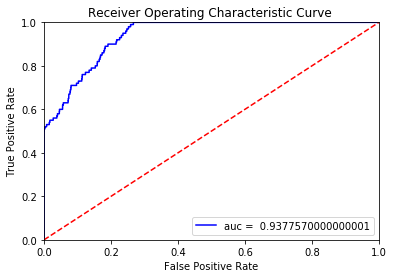

In [70]:
plt.title('Receiver Operating Characteristic Curve ')
plt.plot(fpr_new, tpr_new, 'b',label = 'auc =  0.9377570000000001')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3) 5_c data

In [71]:
c_data = pd.read_csv("5_c.csv")

In [72]:
print(c_data.head(5))

   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579


In [73]:
print("Number of data points :", c_data.shape)
print("The attribute of data :", c_data.columns)

Number of data points : (2852, 2)
The attribute of data : Index(['y', 'prob'], dtype='object')


## 1.calculation of threshold values for c_data

In [92]:
# Threshold list
Threshold_list_c = []
for r in c_data['prob']:
    if r in Threshold_list_c :
        continue
    else:
        Threshold_list_c.append(r)

In [93]:
sorted_threshold_list_c = np.sort(Threshold_list_c)
#print(sorted_threshold_list_c)

In [94]:
# computation of y score for different threshold values :
probability_c = list(c_data['prob'].values)

for r in range(len(sorted_threshold_list_c)) :
    y_predicted_list = generate_Y_predicted(probability_c,sorted_threshold_list_c[r])
    c_data['Y predicted '+str(r)] = y_predicted_list

In [95]:
c_data.shape

(2852, 2793)

In [78]:
# confusion Matrix 
TP_c = []
FN_c= []
FP_c =[]
TN_c= []
for r in range(len(sorted_threshold_list_c)):
    tp,fn,fp,tn = confusion_matrix_calculation(c_data['y'],c_data['Y predicted '+str(r)])
    TP_c.append(tp)
    FN_c.append(fn)
    FP_c.append(fp)
    TN_c.append(tn) 

In [79]:
print(len(TP_c))
print(len(FN_c))
print(len(FP_c))
print(len(TN_c))

2791
2791
2791
2791


## 2. Computation of metric A :

In [105]:
metric_A = []
for r in range(len(sorted_threshold_list_c)):
    a_val = ( 500 * FN_c[r] ) + (100 * FP_c[r])
    metric_A.append(a_val)

In [106]:
# conversion of  matric into dictionary
c_threshold = sorted_threshold_list_c.tolist()
dict_metric_a = dict(zip(c_threshold, metric_A))

In [113]:
# finding the lowest value of metric 
sort_dict = sorted(dict_metric_a.values())
print("The lowest value of A matric is :" ,sort_dict[0])
for threshold, a_val in dict_metric_a.items():    
    if a_val == 141000:
        best_threshold = threshold

#best_threshold = sort_dict[0][0]
print("The best Threshold for the c_data is : ", best_threshold)

The lowest value of A matric is : 141000
The best Threshold for the c_data is :  0.2300390278970873


## 3. Computation of y_score for 5_c data : 𝑦𝑝𝑟𝑒𝑑=[0 if y_score < best_threshold else 1]

In [114]:
y_predicted_best_threshold= generate_Y_predicted(probability_c,best_threshold)

c_data['Y predicted 1 '] = y_predicted_best_threshold

In [115]:
# confusion matrix 

TP_c,FN_c,FP_c,TN_c = confusion_matrix_calculation(c_data['y'],c_data['Y predicted 1 '])
matrix = np.array([[TN_c,FP_c],[FN_c,TP_c]])
print("The Confusion matrix for 5_c_data  for best threshold is : ")
print(matrix)

The Confusion matrix for 5_c_data  for best threshold is : 
[[ 785 1020]
 [  78  969]]


In [116]:
# TPR, FPR, precision, f1, accuracy
recall_score_c = TP_c / (TP_c + FN_c)
precision_score_c = TP_c / ( TP_c + FP_c )

f1_score_c = (2 *(precision_score_c * recall_score_c)) / (precision_score_c + recall_score_c)
print("The f1 score for 5_c data is :",f1_score_c)

acc_score_c = (TP_c +TN_c) / (TP_c + FN_c + FP_c + TN_c)
print("The accuracy Score for 5_c_data :",acc_score_c)

The f1 score for 5_c data is : 0.6383399209486166
The accuracy Score for 5_c_data : 0.615007012622721


# 4) 5_d Data

In [66]:
d_data = pd.read_csv("5_d.csv")
print(d_data.head(5))

       y   pred
0  101.0  100.0
1  120.0  100.0
2  131.0  113.0
3  164.0  125.0
4  154.0  152.0


In [67]:
print("Number of data points :", d_data.shape)
print("The attribute of data :", d_data.columns)

Number of data points : (157200, 2)
The attribute of data : Index(['y', 'pred'], dtype='object')


In [82]:
# Mean Square Error :
y = list(d_data['y'].values)
y_cap = list(d_data['pred'].values)
average_y  = sum(y) / len(y)
error_sum_of_square = 0
for r in range (len(y)):
    error_sum_of_square = error_sum_of_square + np.square(y[r]-y_cap[r])
    
mean_square_error = error_sum_of_square / len(y)
print("Mean square error for regression data, 5d_data is ", mean_square_error)

Mean square error for regression data, 5d_data is  177.16569974554707


In [83]:
# Mean Absolute percentage error 
mape_value = 0
for r in range (len(y)):
    mape_value = mape_value + ((abs(y[r]-y_cap[r]) / average_y) * 100)
    
mape = mape_value/ len(y)
print("Mean Absolute percentage error for regression data, 5d_data is ", mape)

Mean Absolute percentage error for regression data, 5d_data is  12.912029940093051


In [84]:
# total sum of sqaure (SSTO) :
total_sum_of_square = 0
for r in range (len(y)):
    total_sum_of_square = total_sum_of_square + np.square(y[r]-average_y)

In [85]:
# R^2 error 
#R^Squared = 1 - (SSE / SSTO)

r_squared = 1 - (error_sum_of_square /total_sum_of_square)
print("Coefficient_of_determination ( R squared) is : ",r_squared )

Coefficient_of_determination ( R squared) is :  0.9563582786990964
